# Activity 1: Supervised Learning

In this project, our objective is to make predictions and classifications using a real-world dataset. Specifically, we focus on the prices of diamonds as our target variable.

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import math
import warnings

# PREDICTION
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# MLR
from sklearn.linear_model import LinearRegression

# k-NN
from sklearn.neighbors import KNeighborsRegressor

# MLNN-BP
from sklearn.neural_network import MLPRegressor

# PRICE CLASSIFICATION
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# LR
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import SVC

# MLNN-BP
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
# Avoid the warning that occurs when the epoch-based models do not converge (as we make it not converge on purpose in order to perform as many epochs as we want)
# Note that in the Docker container, the warning is shown anyway for some unknown reason and it is not possible to avoid it
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 1. Read the data

In [ ]:
# Read training data file
df = pd.read_csv('diamonds-train.csv', sep = ',', na_filter=False , index_col = 0)
df.head(5)

carat        cut color clarity  depth  table     x     y     z  price
id                                                                       
1    0.53  Very Good     D     VS2   63.2   56.0  5.10  5.15  3.24   1601
2    0.32    Premium     H     VS2   62.4   58.0  4.36  4.33  2.71    648
3    0.76      Ideal     I     SI1   61.8   57.0  5.89  5.83  3.62   2399
4    1.01       Good     H     VS2   60.8   61.0  6.43  6.50  3.93   5229
5    0.73      Ideal     I     VS1   62.1   54.0  5.77  5.80  3.59   2167

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44000 entries, 1 to 44000
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    44000 non-null  float64
 1   cut      44000 non-null  object 
 2   color    44000 non-null  object 
 3   clarity  44000 non-null  object 
 4   depth    44000 non-null  float64
 5   table    44000 non-null  float64
 6   x        44000 non-null  float64
 7   y        44000 non-null  float64
 8   z        44000 non-null  float64
 9   price    44000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


## 2. Data Pre-processing

In [ ]:
df[['cut','color','clarity']] = df[['cut','color','clarity']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44000 entries, 1 to 44000
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    44000 non-null  float64 
 1   cut      44000 non-null  category
 2   color    44000 non-null  category
 3   clarity  44000 non-null  category
 4   depth    44000 non-null  float64 
 5   table    44000 non-null  float64 
 6   x        44000 non-null  float64 
 7   y        44000 non-null  float64 
 8   z        44000 non-null  float64 
 9   price    44000 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 2.8 MB


In [ ]:
df.head(5)

carat        cut color clarity  depth  table     x     y     z  price
id                                                                       
1    0.53  Very Good     D     VS2   63.2   56.0  5.10  5.15  3.24   1601
2    0.32    Premium     H     VS2   62.4   58.0  4.36  4.33  2.71    648
3    0.76      Ideal     I     SI1   61.8   57.0  5.89  5.83  3.62   2399
4    1.01       Good     H     VS2   60.8   61.0  6.43  6.50  3.93   5229
5    0.73      Ideal     I     VS1   62.1   54.0  5.77  5.80  3.59   2167

In [ ]:
columns = df.columns.tolist() # All columns list
print(columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']


### a) Identify the patterns with “non-physical” data

---



In this section we have to search for "non-physical" values that appear in the given data so we can delete non coherent numbers (like negative metric measures).

In [ ]:
non_categorical_cols = df.select_dtypes(exclude=['category']).columns.tolist() # Non categorical columns list
print(f"Non categorical columns: {non_categorical_cols}")

Non categorical columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [ ]:
# Search for negative values
columns_with_negative_values = []
for col in non_categorical_cols:
    if (df[col] < 0).any(): # Checks if there is ANY negative values
        print(f"Column '{col}' contains negative values.")
        print(df[df[col] < 0])
        columns_with_negative_values.append(col)

# Search for zero values
columns_with_zero_values = []
for col in non_categorical_cols:
    if (df[col] == 0).any(): # Checks if there is ANY zero values
      print(f"Column '{col}' contains zero values.")
      print(df[df[col] == 0])
      columns_with_zero_values.append(col)

Column 'x' contains zero values.
       carat        cut color clarity  depth  table    x    y    z  price
id                                                                       
1578    1.00  Very Good     H     VS2   63.3   53.0  0.0  0.0  0.0   5139
9859    1.56      Ideal     G     VS2   62.2   54.0  0.0  0.0  0.0  12800
11596   1.14       Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381
11838   0.71       Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
15635   0.71       Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
30338   2.25    Premium     H     SI2   62.8   59.0  0.0  0.0  0.0  18034
Column 'y' contains zero values.
       carat        cut color clarity  depth  table    x    y    z  price
id                                                                       
1578    1.00  Very Good     H     VS2   63.3   53.0  0.0  0.0  0.0   5139
9859    1.56      Ideal     G     VS2   62.2   54.0  0.0  0.0  0.0  12800
11596   1.14       Fair     G     VS1   57.5  

In [ ]:
# We set the given ranges for each attribute:
ranges = {
    'price': (326, 18823),
    'carat': (0.2, 5.01),
    'x': (0, 10.74),
    'y': (0, 58.9),
    'z': (0, 31.8),
    'depth': (43, 79),
    'table': (43, 95)
}

# Check if ALL the non categorical column values are within the specified range
for col, (min_val, max_val) in ranges.items():
    out_range = df[(df[col] < min_val) | (df[col] > max_val)]
    if not out_range.empty:
        print(f"Column '{col}' contains values outside the range ['{min_val}','{max_val}']:")
        print(out_range)


All the values were in the defined ranges. Only non-coherent zero values were found, as there are rows with $z = 0$ but $depth \neq 0$, having defined depth as $\frac{2 \cdot z}{x+y}$.

We will delete them:

In [ ]:
# Remove rows where 'x', 'y', or 'z' are equal to 0
# defining .any(axis=1) we check for all rows with any of its variables equal to zero
df = df[~(df[columns_with_zero_values] == 0).any(axis=1)]


### b) Identify outliers from the distribution of each attribute.

Now, we will search for outliers in the data. To do that, we will use
1. Scatter plots
2. Box plots
3. Histograms

Scatter plots between every pair of non-categorical attributes:

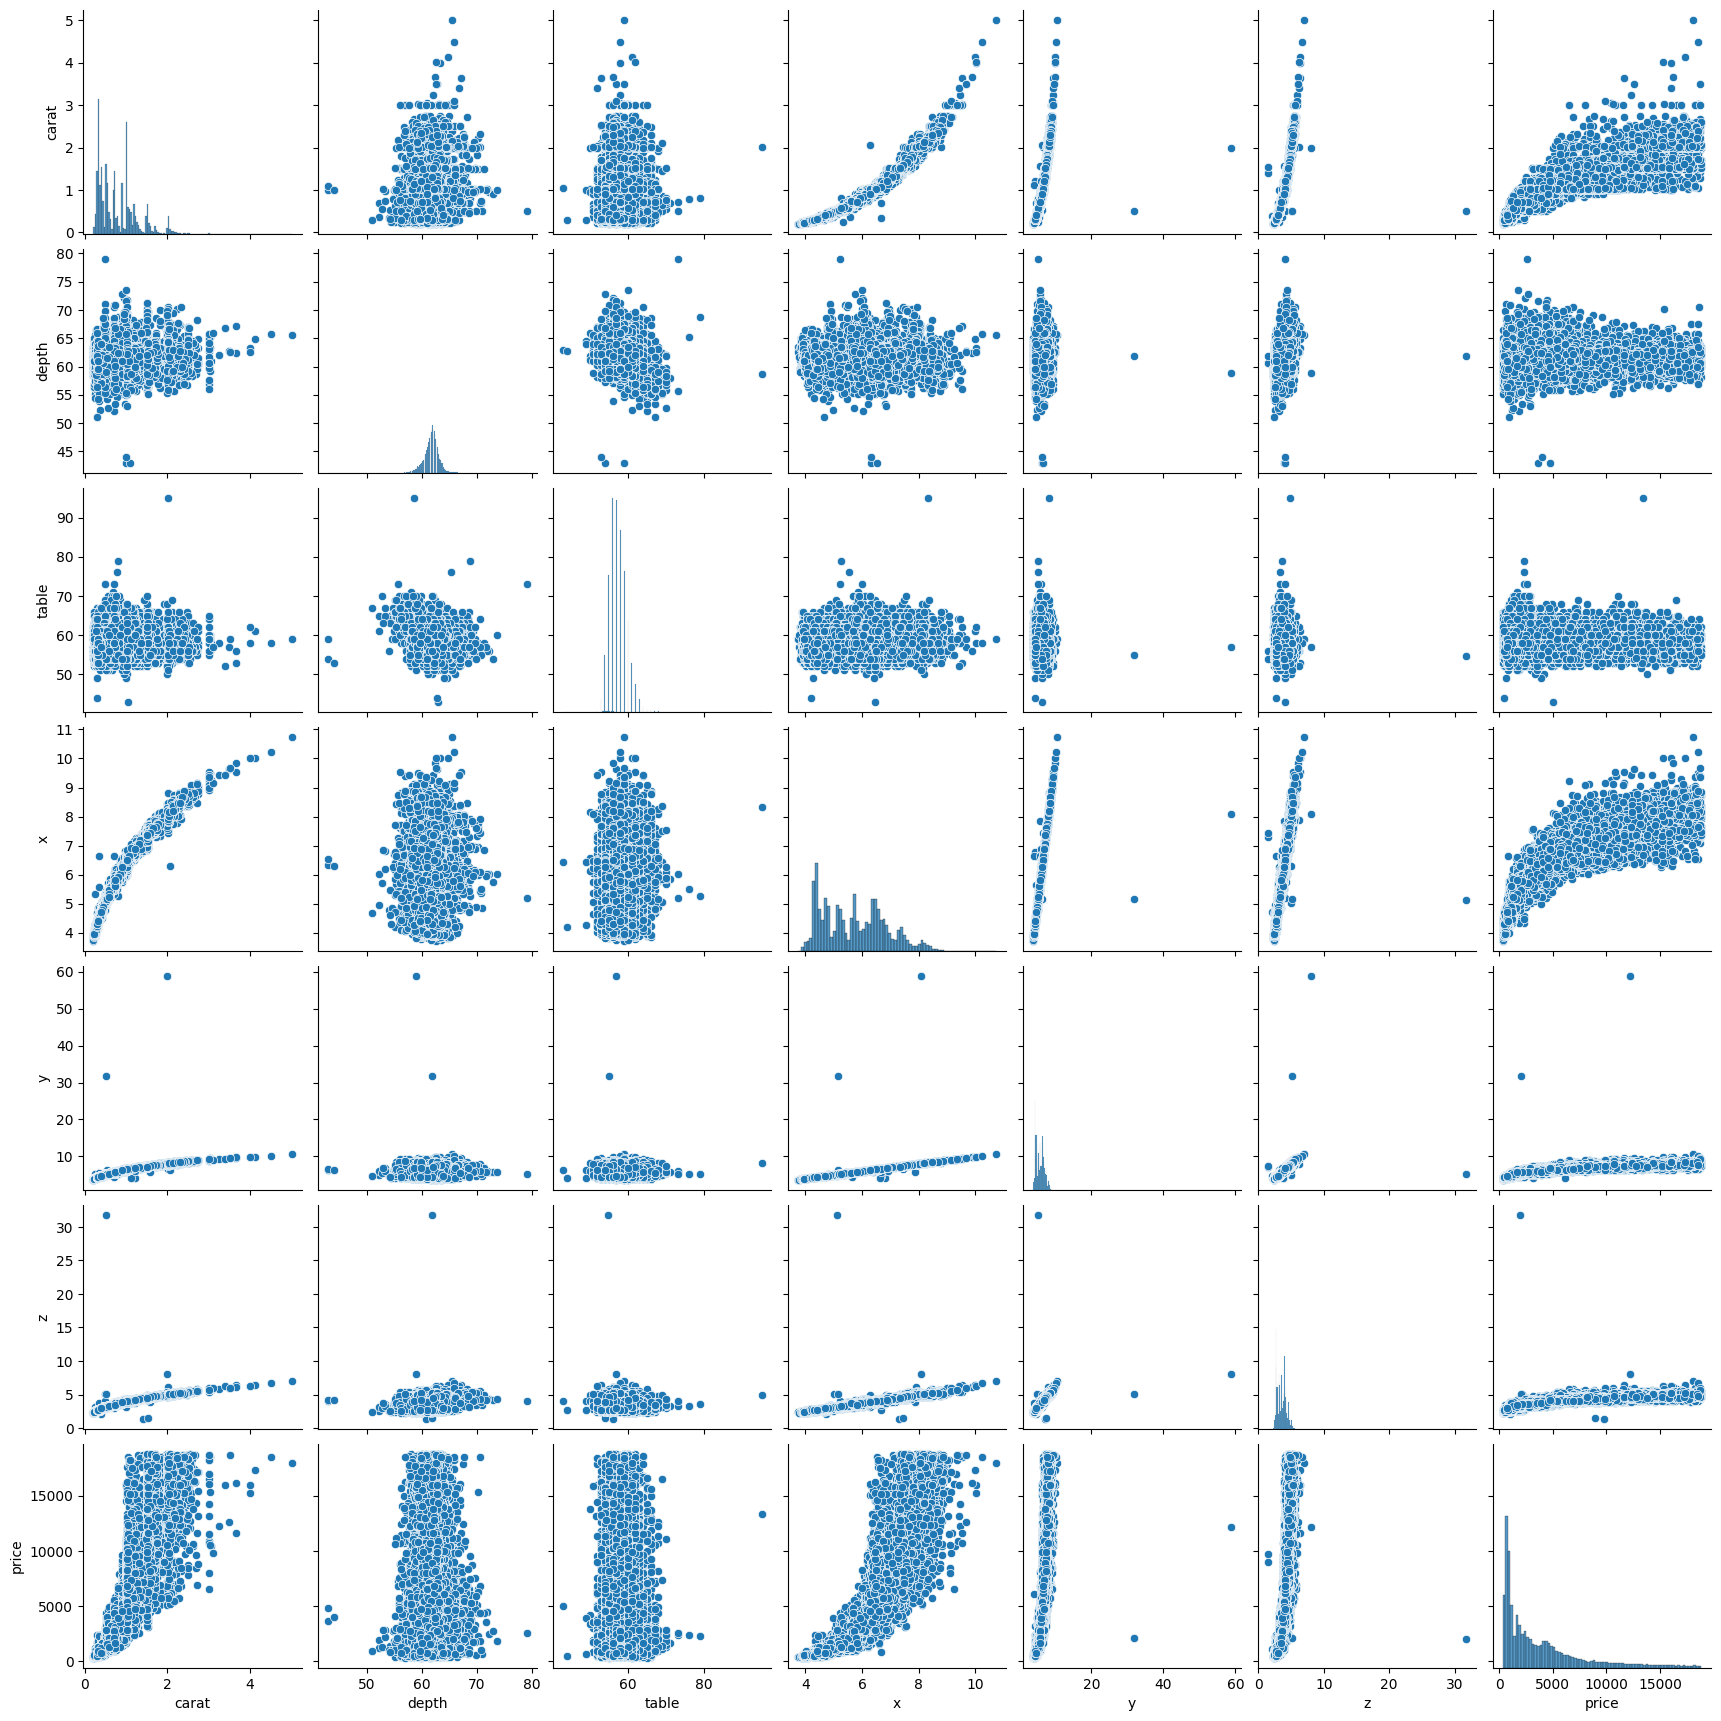

In [ ]:
sns.pairplot(df)

Boxplots of categorical data:

In [ ]:
categorical_cols = df.select_dtypes(include=['category']).columns.tolist() # Categorical columns list
print('Categorical columns:', categorical_cols)

Categorical columns: ['cut', 'color', 'clarity']


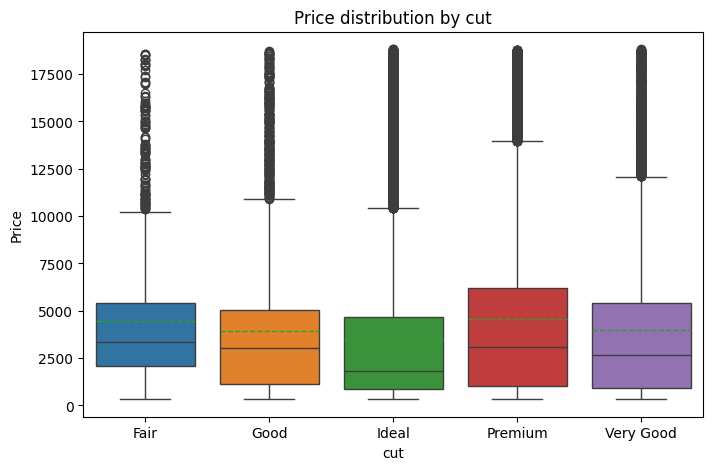

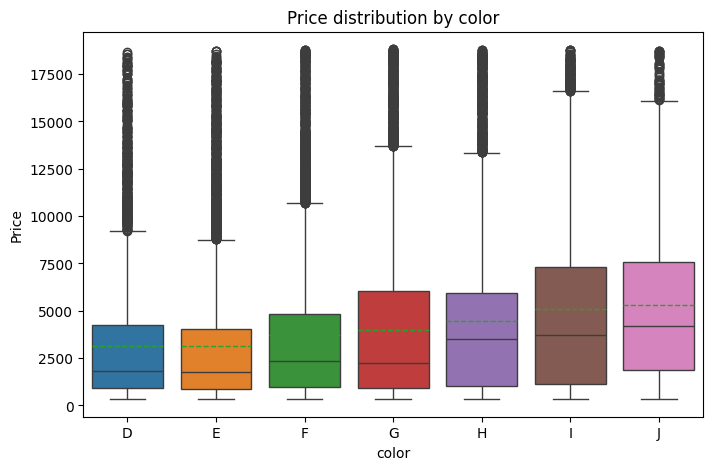

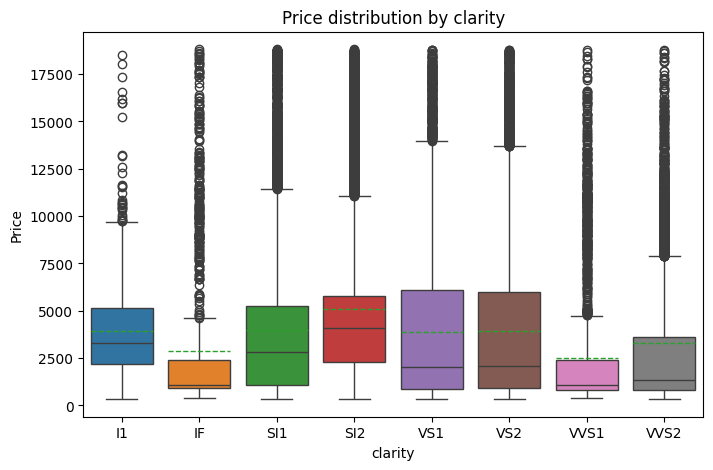

In [ ]:
for column in categorical_cols:
    # For categorical variables, use a boxplot for price distribution
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='price', hue=column, legend=False, showmeans=True, meanline=True)
    plt.title(f'Price distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

Boxplots of non-categorical data:

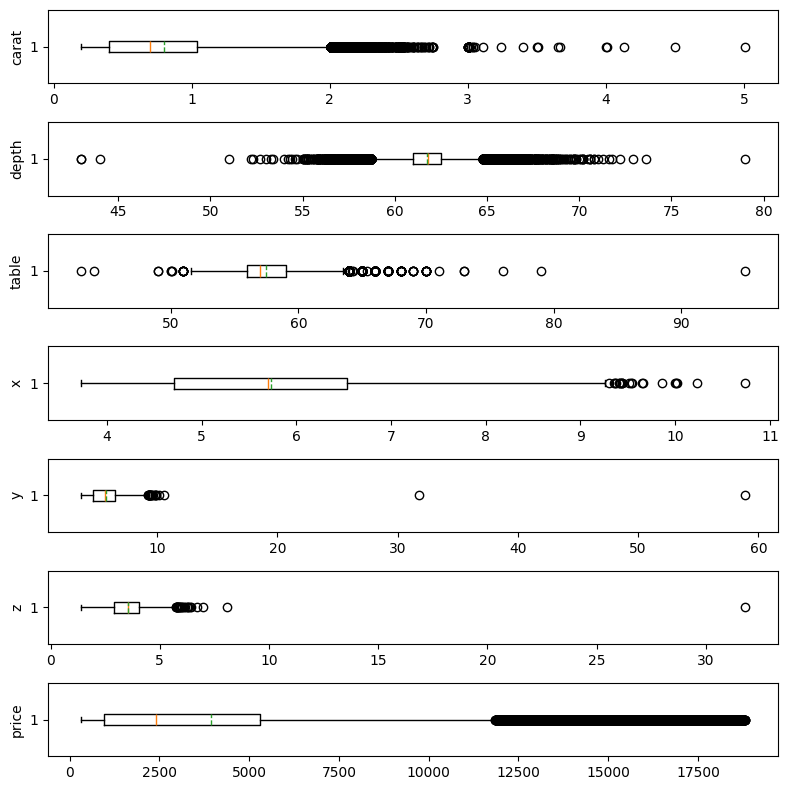

In [ ]:
# Box Plots
fig, axs = plt.subplots(len(non_categorical_cols), 1, figsize=(8, 8))
i = 0
for col in non_categorical_cols:
    axs[i].boxplot(df[col], vert=False, showmeans=True, meanline=True)
    axs[i].set_ylabel(col)
    i += 1
plt.tight_layout()
plt.show()

Histograms:

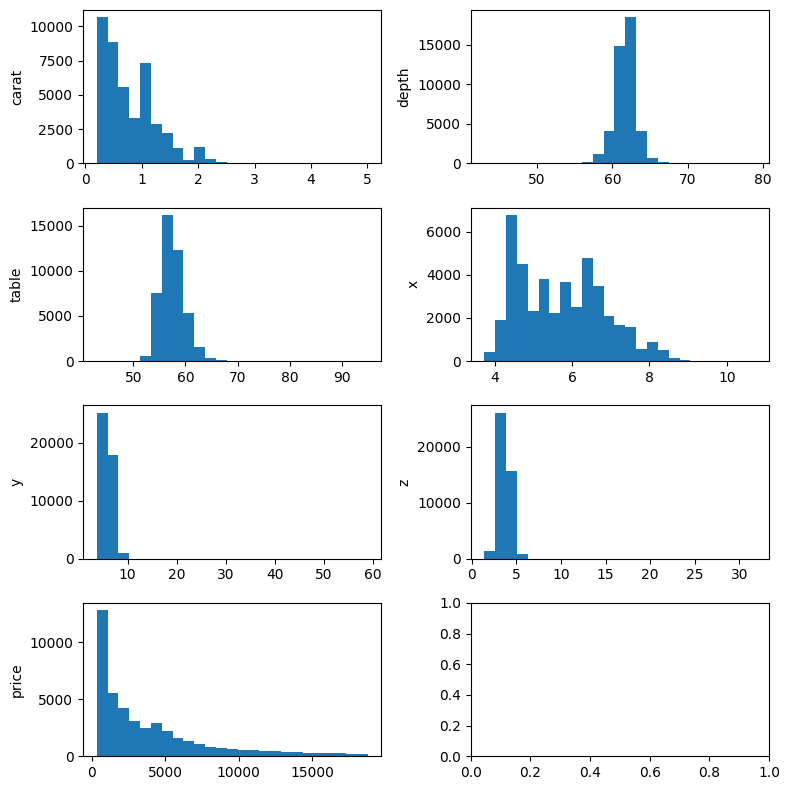

In [ ]:
# Histograms
fig, axs = plt.subplots(math.ceil(len(non_categorical_cols)/2), 2, figsize=(8,8))
i = 0
for col in non_categorical_cols:
    axs[i // 2, i % 2].hist(df[col], bins=25)
    axs[i // 2, i % 2].set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

### c) Identify outliers from attribute/price scatter plots.

Scatter plot of only non-categorical attributes vs price (we don't plot categorical values because it would be of no use, as boxplots already serve the same purpose):

In [ ]:
non_categorical_no_price_cols = non_categorical_cols.copy()
non_categorical_no_price_cols.remove('price') # non categorical columns list without the price column
print('Non categorical columns without the price:', non_categorical_no_price_cols)

Non categorical columns without the price: ['carat', 'depth', 'table', 'x', 'y', 'z']


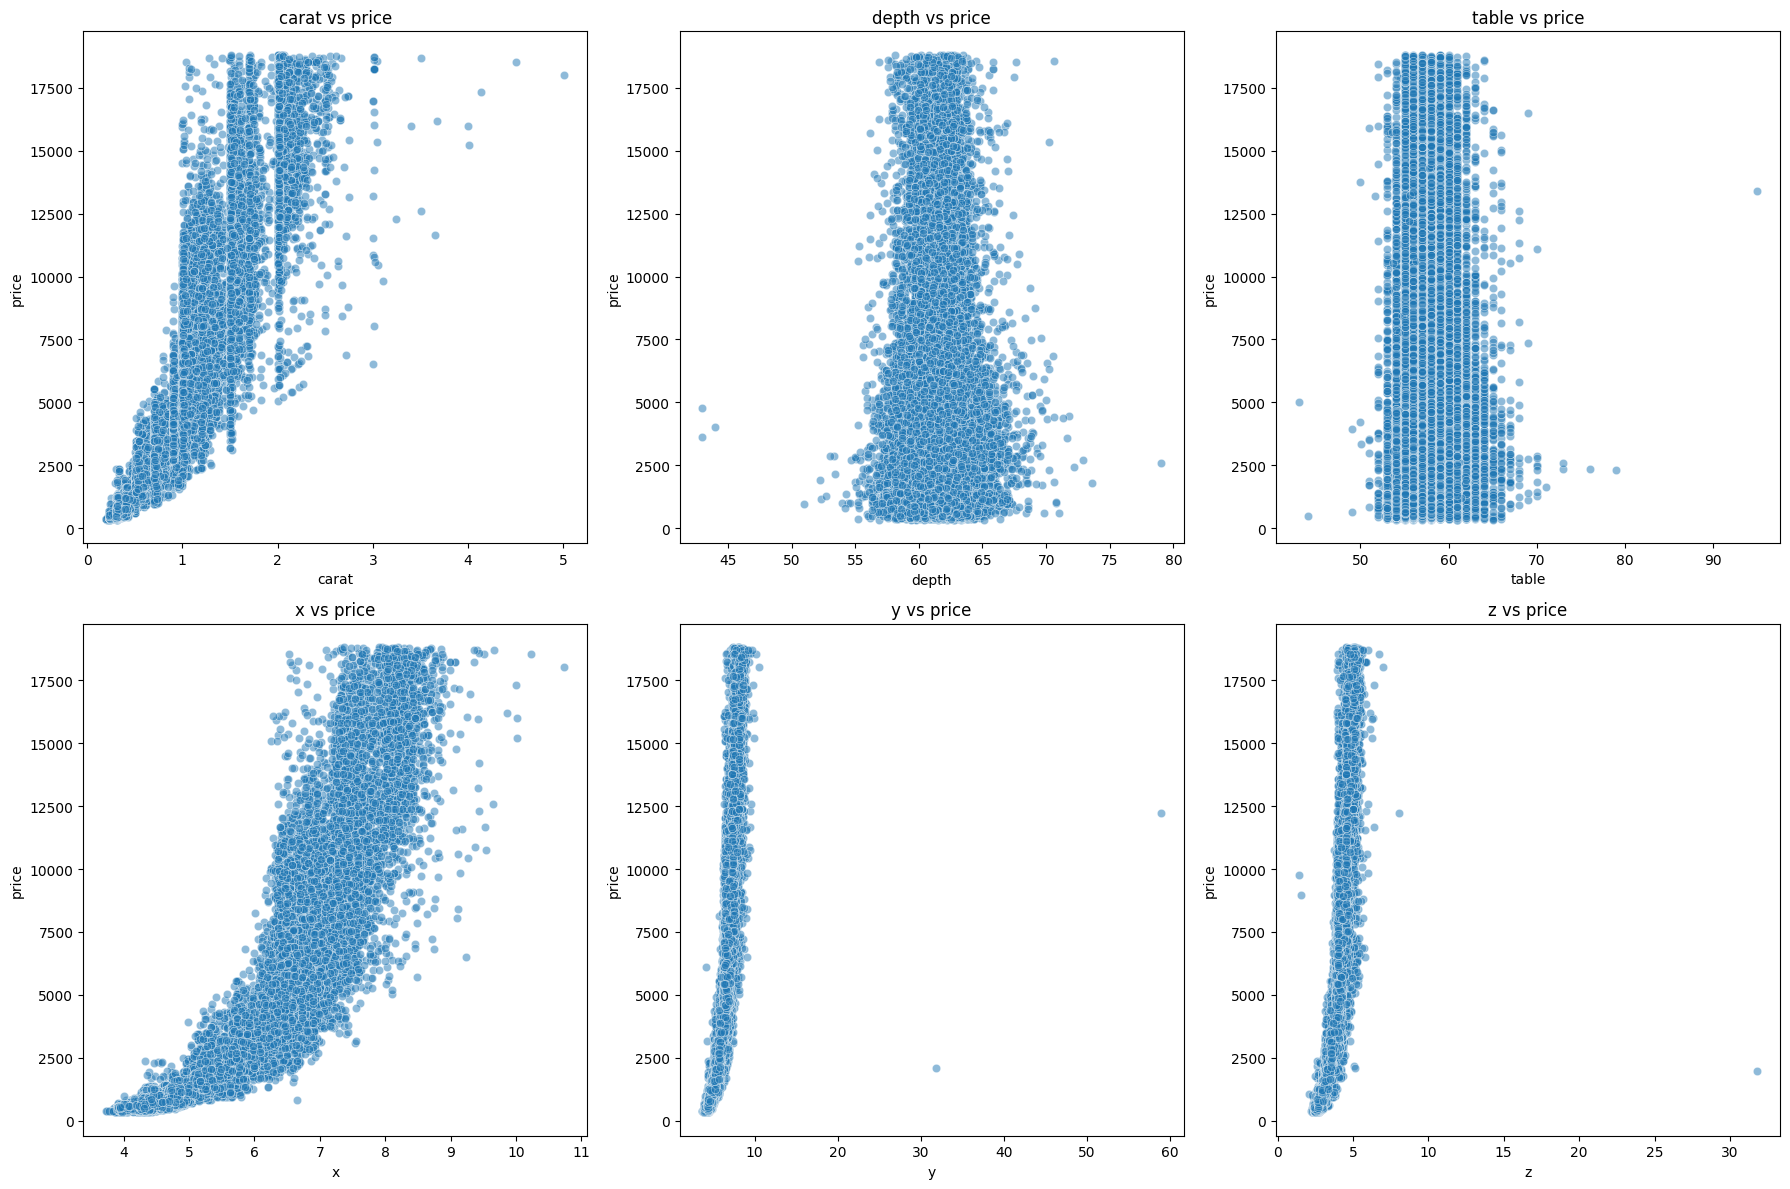

In [ ]:
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(non_categorical_no_price_cols, 1):
    plt.subplot(math.ceil(len(non_categorical_no_price_cols)/3), 3, idx)
    sns.scatterplot(x=feature, y='price', alpha=.5, data=df)
    plt.title(f'{feature} vs price')
plt.tight_layout()
plt.show()

### d) Make a table with the outlier identifiers, their attributes, and the reasons for which each is considered an outlier.

First, we notice there are no outliers that come from categorical attributes, as all data points outside the boxplots's whiskers are continuously distributed, not clearly isolated.\
Therefore we are only going to work with non-categorical values.

After going back to observe the plots of section **b**, we notice outliers on the Pairplot (the first plot of the section) and the Boxplots of non-categorical data (the third one).\
Since section **c**'s plots are already included in section **b**'s pairplot, we will not work with them in a dedicated piece of code.\
If we stop for a moment and think, we also realize that the boxplots and the Pairplot contain the same information on outliers, as boxplots are just projections of the Pairplot data on the corresponding axis.

In [ ]:
# New data frame to save outlayers
out_df = pd.DataFrame(
    False, # fill value
    index = df.index, # same number of rows
    columns = ['out_' + col for col in non_categorical_cols]  # renamed columns
)

# First we determine the thresholds for outliers, which we define by looking at the plots
thresh_out = {
    'price': (326, 18823),
    'carat': (0.2, 5.01),
    'x': (0, 10.74),
    'y': (0, 20),
    'z': (1.75, 10),
    'depth': (50, 77),
    'table': (45, 74)
}

# Loop through each column and check for outliers
for col, (thresh_inf, thresh_sup) in thresh_out.items():
    # Define the outlier condition
    outlier_condition = (df[col] < thresh_inf) | (df[col] > thresh_sup)

    # Update the out_df DataFrame
    out_df['out_' + col] = outlier_condition

# Remove rows where all columns are False
# This means that the row is not an outlier in any column
out_df = out_df[~(out_df == False).all(axis=1)]

out_df.head()


out_carat  out_depth  out_table  out_x  out_y  out_z  out_price
id                                                                   
1092      False       True      False  False  False  False      False
4497      False      False       True  False  False  False      False
5163      False      False       True  False  False  False      False
6368      False      False      False  False  False   True      False
7480      False       True      False  False  False  False      False

In [ ]:
# Right-join the outliers with the original DataFrame
# This will keep all the rows from out_df and add the corresponding rows from df
outliers = df.merge(out_df, left_index=True, right_index=True, how='right')
outliers.head()

carat    cut color clarity  depth  table     x     y     z  price  \
id                                                                        
1092   1.00   Fair     G     SI1   43.0   59.0  6.32  6.27  3.97   3634   
4497   2.01   Fair     F     SI1   58.6   95.0  8.32  8.31  4.87  13387   
5163   0.81   Fair     F     SI2   68.8   79.0  5.26  5.20  3.58   2301   
6368   1.41  Ideal     H     VS1   60.7   56.0  7.31  7.22  1.41   9752   
7480   1.09  Ideal     J     VS2   43.0   54.0  6.53  6.55  4.12   4778   

      out_carat  out_depth  out_table  out_x  out_y  out_z  out_price  
id                                                                     
1092      False       True      False  False  False  False      False  
4497      False      False       True  False  False  False      False  
5163      False      False       True  False  False  False      False  
6368      False      False      False  False  False   True      False  
7480      False       True      False  False  False  False      False

### e) Decide what to do with the outliers and apply it to the datasets

We decided to remove all the outliers

In [ ]:
outliers_ind = outliers.index.tolist()
print(f"There are {len(outliers_ind)} outliers in the dataset.")

# Remove outliers from the original DataFrame
df_clean = df.drop(index=outliers_ind)

df_clean.head(5)

There are 14 outliers in the dataset.


carat        cut color clarity  depth  table     x     y     z  price
id                                                                       
1    0.53  Very Good     D     VS2   63.2   56.0  5.10  5.15  3.24   1601
2    0.32    Premium     H     VS2   62.4   58.0  4.36  4.33  2.71    648
3    0.76      Ideal     I     SI1   61.8   57.0  5.89  5.83  3.62   2399
4    1.01       Good     H     VS2   60.8   61.0  6.43  6.50  3.93   5229
5    0.73      Ideal     I     VS1   62.1   54.0  5.77  5.80  3.59   2167

In [ ]:
# Reset indexes so that there are no skipped numbers
df_clean = df_clean.reset_index(drop=True) # remove old index
df_clean.index = range(1, len(df_clean) + 1) # set new index
df_clean.index.name = 'id' # restablish index name
df_clean.head(5)

carat        cut color clarity  depth  table     x     y     z  price
id                                                                       
1    0.53  Very Good     D     VS2   63.2   56.0  5.10  5.15  3.24   1601
2    0.32    Premium     H     VS2   62.4   58.0  4.36  4.33  2.71    648
3    0.76      Ideal     I     SI1   61.8   57.0  5.89  5.83  3.62   2399
4    1.01       Good     H     VS2   60.8   61.0  6.43  6.50  3.93   5229
5    0.73      Ideal     I     VS1   62.1   54.0  5.77  5.80  3.59   2167

Now we plot the same two representations with the clean data to see if everything looks correct

Scatter plots between every pair of non-categorical attributes:

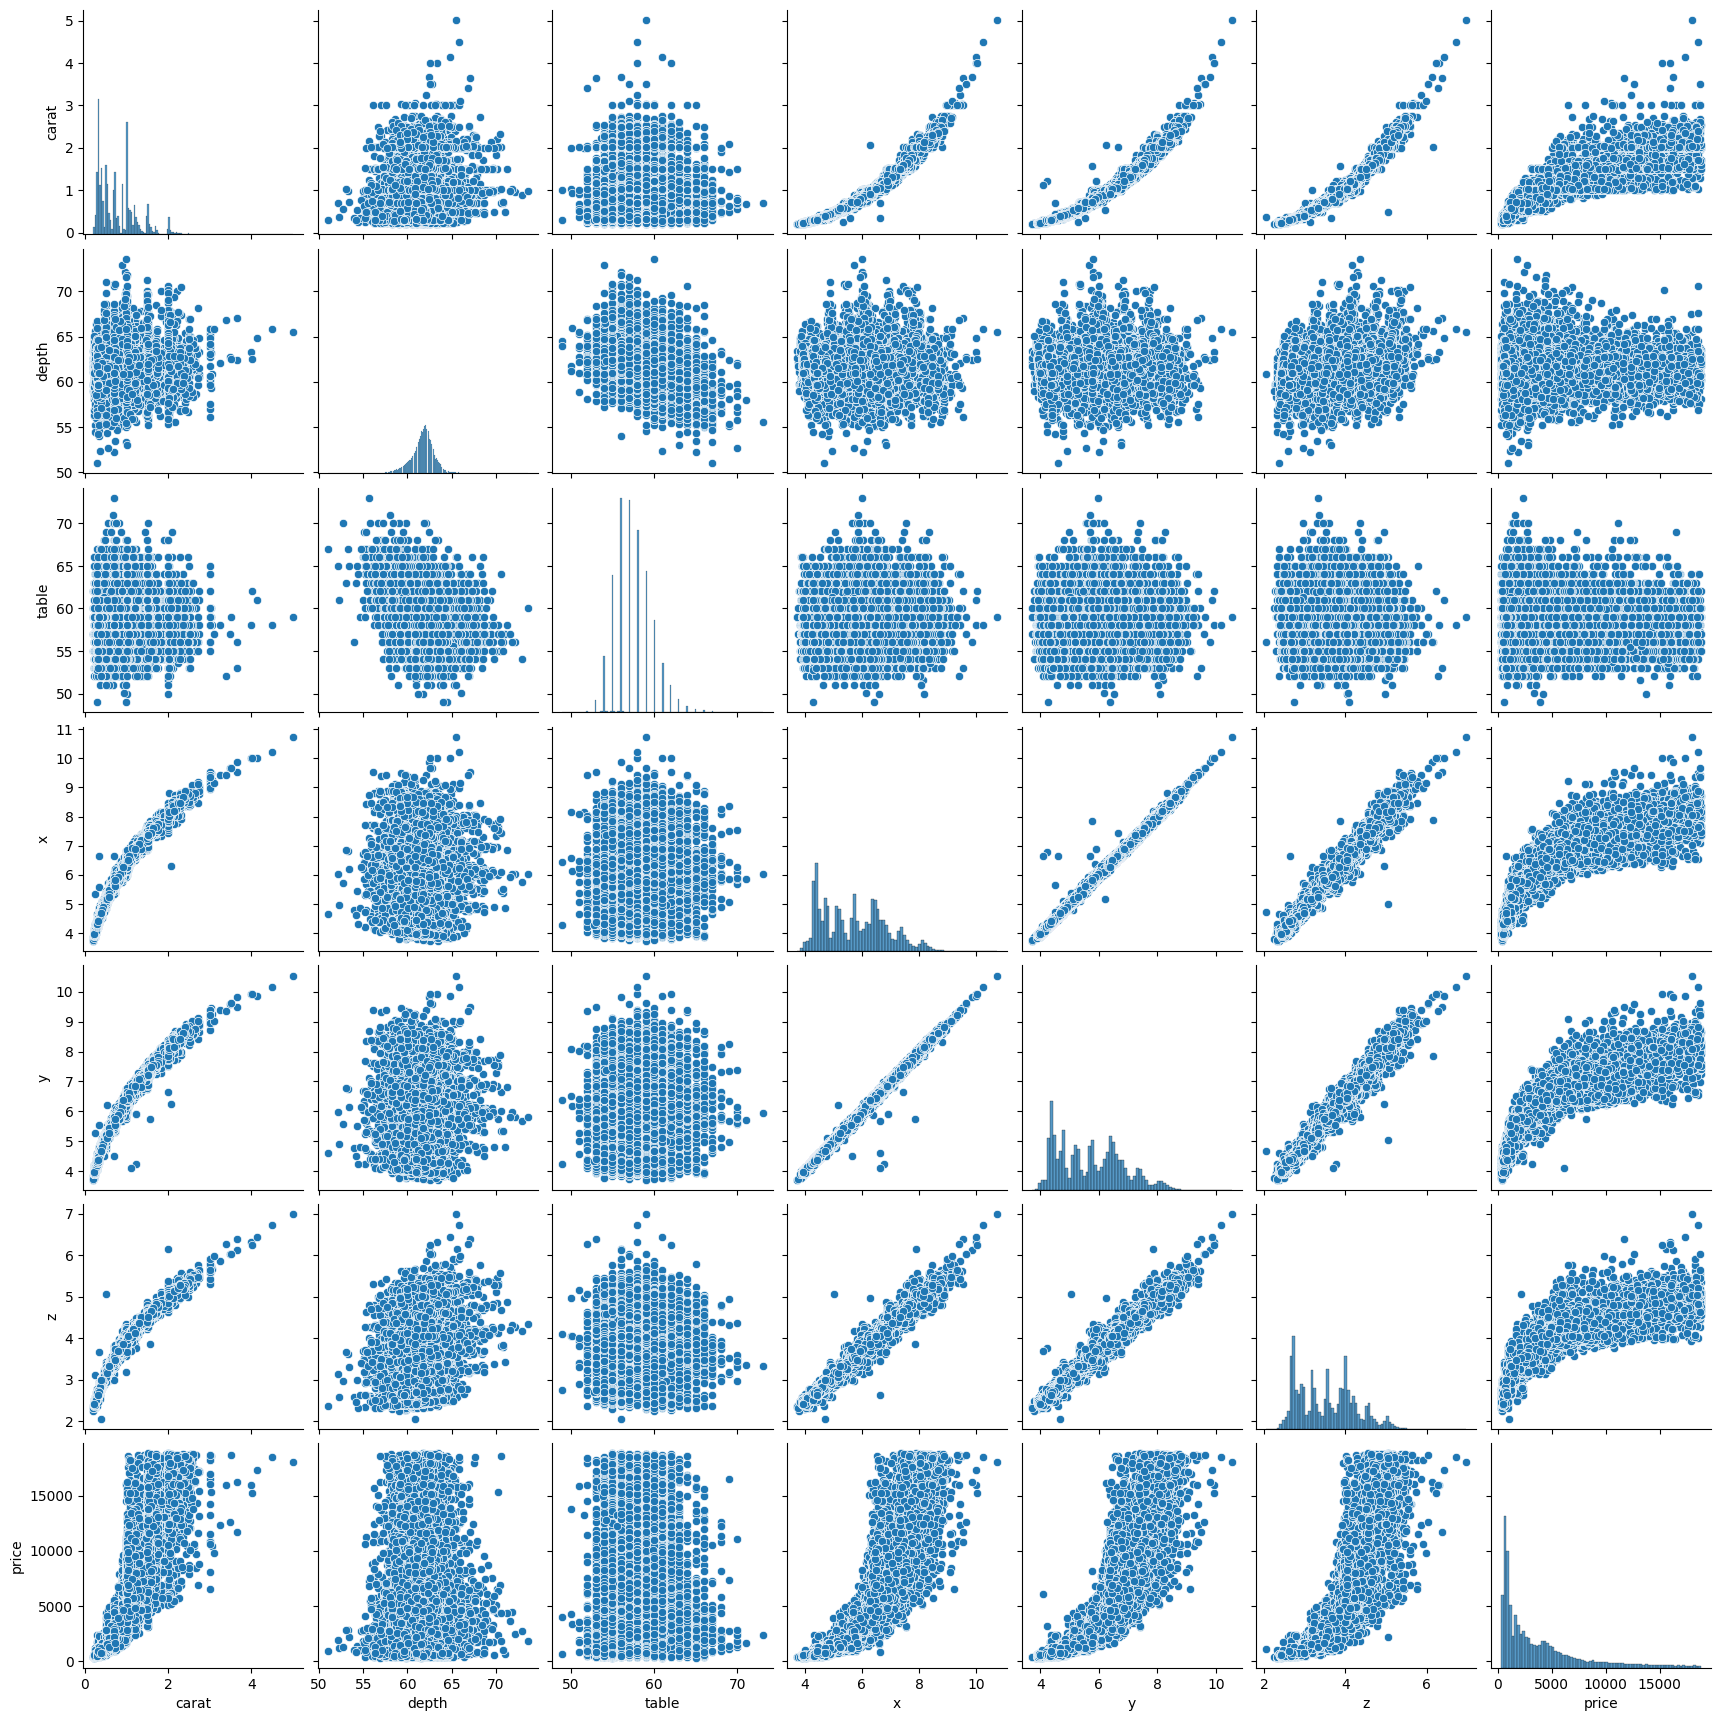

In [ ]:
sns.pairplot(df_clean)

Boxplots of non-categorical data:

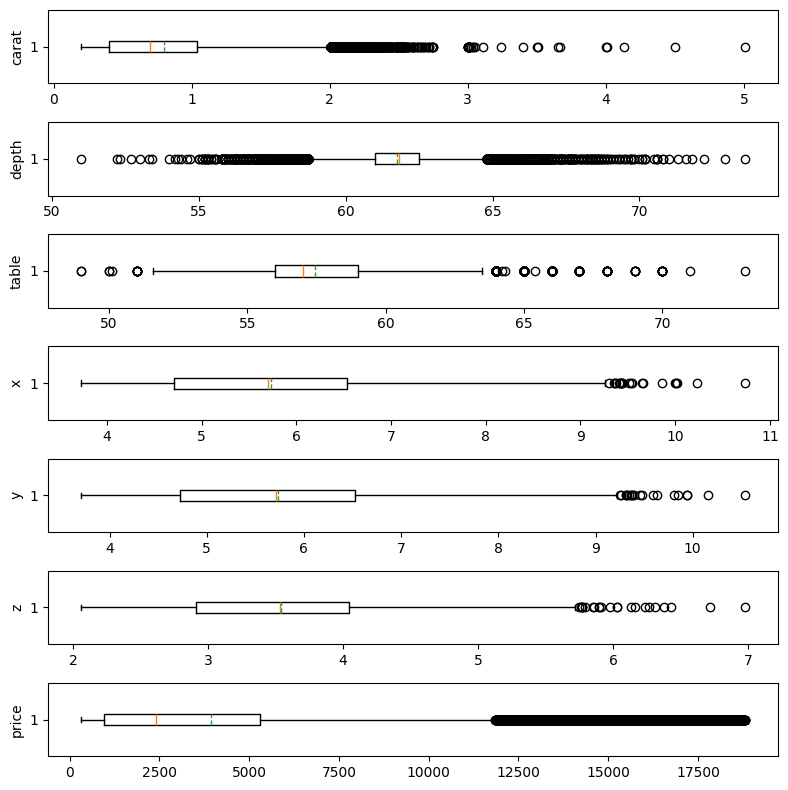

In [ ]:
# Box Plots
fig, axs = plt.subplots(len(non_categorical_cols), 1, figsize=(8, 8))
i = 0
for col in non_categorical_cols:
    axs[i].boxplot(df_clean[col], vert=False, showmeans=True, meanline=True)
    axs[i].set_ylabel(col)
    i += 1
plt.tight_layout()
plt.show()

### f) Convert categorical attributes to numeric. Note that, due to their semantics, the values ​​of each categorical attribute are ordered, and therefore a numeric representation makes more sense than a one-hot encoding.

In [ ]:
# Categorical attributes ordered from worst to best
cut_catg = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_catg = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_catg  = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# Map each category to a number
df_clean['cut'] = df_clean['cut'].map(cut_catg)
df_clean['color'] = df_clean['color'].map(color_catg)
df_clean['clarity'] = df_clean['clarity'].map(clarity_catg)

df_clean.head(10)

carat cut color clarity  depth  table     x     y     z  price
id                                                                
1    0.53   3     7       4   63.2   56.0  5.10  5.15  3.24   1601
2    0.32   4     3       4   62.4   58.0  4.36  4.33  2.71    648
3    0.76   5     2       3   61.8   57.0  5.89  5.83  3.62   2399
4    1.01   2     3       4   60.8   61.0  6.43  6.50  3.93   5229
5    0.73   5     2       5   62.1   54.0  5.77  5.80  3.59   2167
6    0.31   4     7       3   62.1   58.0  4.33  4.30  2.68    732
7    0.32   3     3       3   61.8   56.0  4.38  4.41  2.71    482
8    0.32   5     3       3   61.2   56.0  4.43  4.46  2.72    430
9    0.70   3     5       3   61.1   57.0  5.70  5.73  3.49   2409
10   1.80   5     5       3   61.4   54.0  7.86  7.82  4.81  16340

### g) Standardize all attributes separately, except x, y, z, and price.

In [ ]:
atr_to_standarize = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

# Initialize scaler
scaler_std = StandardScaler()
# Standarize data with "fit_transform" and replace the table with the transformed data
df_clean[atr_to_standarize] = scaler_std.fit_transform(df_clean[atr_to_standarize])
df_clean.head(5)

carat       cut     color   clarity     depth     table     x     y  \
id                                                                           
1  -0.565234 -0.810247  1.522675 -0.033681  1.020420 -0.653054  5.10  5.15   
2  -1.008792  0.084556 -0.828003 -0.033681  0.456735  0.248843  4.36  4.33   
3  -0.079432  0.979358 -1.415673 -0.639886  0.033971 -0.202105  5.89  5.83   
4   0.448614 -1.705050 -0.828003 -0.033681 -0.670636  1.601690  6.43  6.50   
5  -0.142797  0.979358 -1.415673  0.572524  0.245353 -1.554952  5.77  5.80   

       z  price  
id               
1   3.24   1601  
2   2.71    648  
3   3.62   2399  
4   3.93   5229  
5   3.59   2167

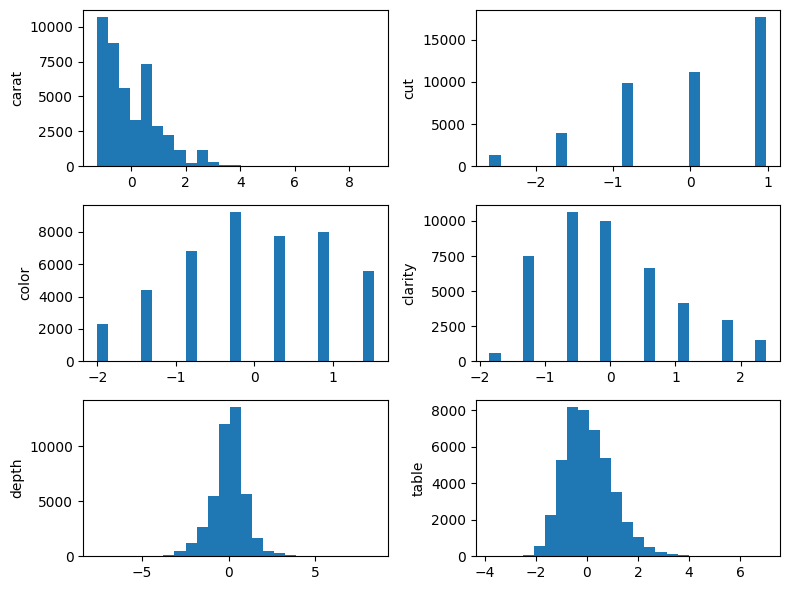

In [ ]:
# Histograms for standarized data
fig, axs = plt.subplots(math.ceil(len(atr_to_standarize)/2), 2, figsize=(8,6))
i = 0
for col in atr_to_standarize:
    axs[i // 2, i % 2].hist(df_clean[col], bins=25)
    axs[i // 2, i % 2].set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

### h) Scale x, y, and z between -1 and 1, but together, not each attribute separately.

In this section we need to get the maximum and the minimum of all the values x, y and z.

In [ ]:
atr_to_scale = ['x', 'y', 'z']

# We manipulate their values as a single 1D vector
xyz = df_clean[atr_to_scale].values.flatten()


# Initalize scaler
scale_minmax = MinMaxScaler(feature_range=(-1, 1))
# Scale all values between -1 and 1
scaled_xyz = scale_minmax.fit_transform(xyz.reshape(-1, 1)) # reshape(n_rows, n_columns) before transforming

# Reshape the scaled data to its original dimensions (n_rows, n_columns) and
# replace table with the scaled data
df_clean[atr_to_scale] = scaled_xyz.reshape(-1, len(atr_to_scale))

df_clean.head(5)

carat       cut     color   clarity     depth     table         x  \
id                                                                         
1  -0.565234 -0.810247  1.522675 -0.033681  1.020420 -0.653054 -0.299539   
2  -1.008792  0.084556 -0.828003 -0.033681  0.456735  0.248843 -0.470046   
3  -0.079432  0.979358 -1.415673 -0.639886  0.033971 -0.202105 -0.117512   
4   0.448614 -1.705050 -0.828003 -0.033681 -0.670636  1.601690  0.006912   
5  -0.142797  0.979358 -1.415673  0.572524  0.245353 -1.554952 -0.145161   

           y         z  price  
id                             
1  -0.288018 -0.728111   1601  
2  -0.476959 -0.850230    648  
3  -0.131336 -0.640553   2399  
4   0.023041 -0.569124   5229  
5  -0.138249 -0.647465   2167

### i) Since the price has a range of variation that extends three orders of magnitude, instead of working with the price it is better to do it with its logarithm. Therefore, calculate the logarithm of the prices, store it in a new attribute log_price, and apply a linear scaling between 0.1 and 0.9.

In [ ]:
df_clean['log_price'] = np.log(df_clean['price'])

#  Initalize scaler
scale_log_minmax = MinMaxScaler(feature_range=(0.1, 0.9))

# Scale all values between 0.1 and 0.9 and replace table with the scaled data
df_clean['log_price'] = scale_log_minmax.fit_transform(df_clean[['log_price']])

df_clean.head(5)

carat       cut     color   clarity     depth     table         x  \
id                                                                         
1  -0.565234 -0.810247  1.522675 -0.033681  1.020420 -0.653054 -0.299539   
2  -1.008792  0.084556 -0.828003 -0.033681  0.456735  0.248843 -0.470046   
3  -0.079432  0.979358 -1.415673 -0.639886  0.033971 -0.202105 -0.117512   
4   0.448614 -1.705050 -0.828003 -0.033681 -0.670636  1.601690  0.006912   
5  -0.142797  0.979358 -1.415673  0.572524  0.245353 -1.554952 -0.145161   

           y         z  price  log_price  
id                                        
1  -0.288018 -0.728111   1601   0.413928  
2  -0.476959 -0.850230    648   0.235513  
3  -0.131336 -0.640553   2399   0.493702  
4   0.023041 -0.569124   5229   0.647397  
5  -0.138249 -0.647465   2167   0.473640

### j) Construct a new attribute high_price that is worth 0 if the price is strictly below $2,500 and 1 otherwise.

In [ ]:
df_clean['high_price'] = np.where(df_clean['price'] >= 2500, 1, 0)

df_clean.head(5)

carat       cut     color   clarity     depth     table         x  \
id                                                                         
1  -0.565234 -0.810247  1.522675 -0.033681  1.020420 -0.653054 -0.299539   
2  -1.008792  0.084556 -0.828003 -0.033681  0.456735  0.248843 -0.470046   
3  -0.079432  0.979358 -1.415673 -0.639886  0.033971 -0.202105 -0.117512   
4   0.448614 -1.705050 -0.828003 -0.033681 -0.670636  1.601690  0.006912   
5  -0.142797  0.979358 -1.415673  0.572524  0.245353 -1.554952 -0.145161   

           y         z  price  log_price  high_price  
id                                                    
1  -0.288018 -0.728111   1601   0.413928           0  
2  -0.476959 -0.850230    648   0.235513           0  
3  -0.131336 -0.640553   2399   0.493702           0  
4   0.023041 -0.569124   5229   0.647397           1  
5  -0.138249 -0.647465   2167   0.473640           0

## 3. Price prediction

### Test data preprocessing

In this subsection, we transform the test data using the scaling parameters obtained from the training data, ensuring consistency between the two sets.

In [ ]:
# Read testing file
df_test_original = pd.read_csv('diamonds-test.csv', sep = ',', na_filter=False , index_col = 0)
df.head(5)

carat        cut color clarity  depth  table     x     y     z  price
id                                                                       
1    0.53  Very Good     D     VS2   63.2   56.0  5.10  5.15  3.24   1601
2    0.32    Premium     H     VS2   62.4   58.0  4.36  4.33  2.71    648
3    0.76      Ideal     I     SI1   61.8   57.0  5.89  5.83  3.62   2399
4    1.01       Good     H     VS2   60.8   61.0  6.43  6.50  3.93   5229
5    0.73      Ideal     I     VS1   62.1   54.0  5.77  5.80  3.59   2167

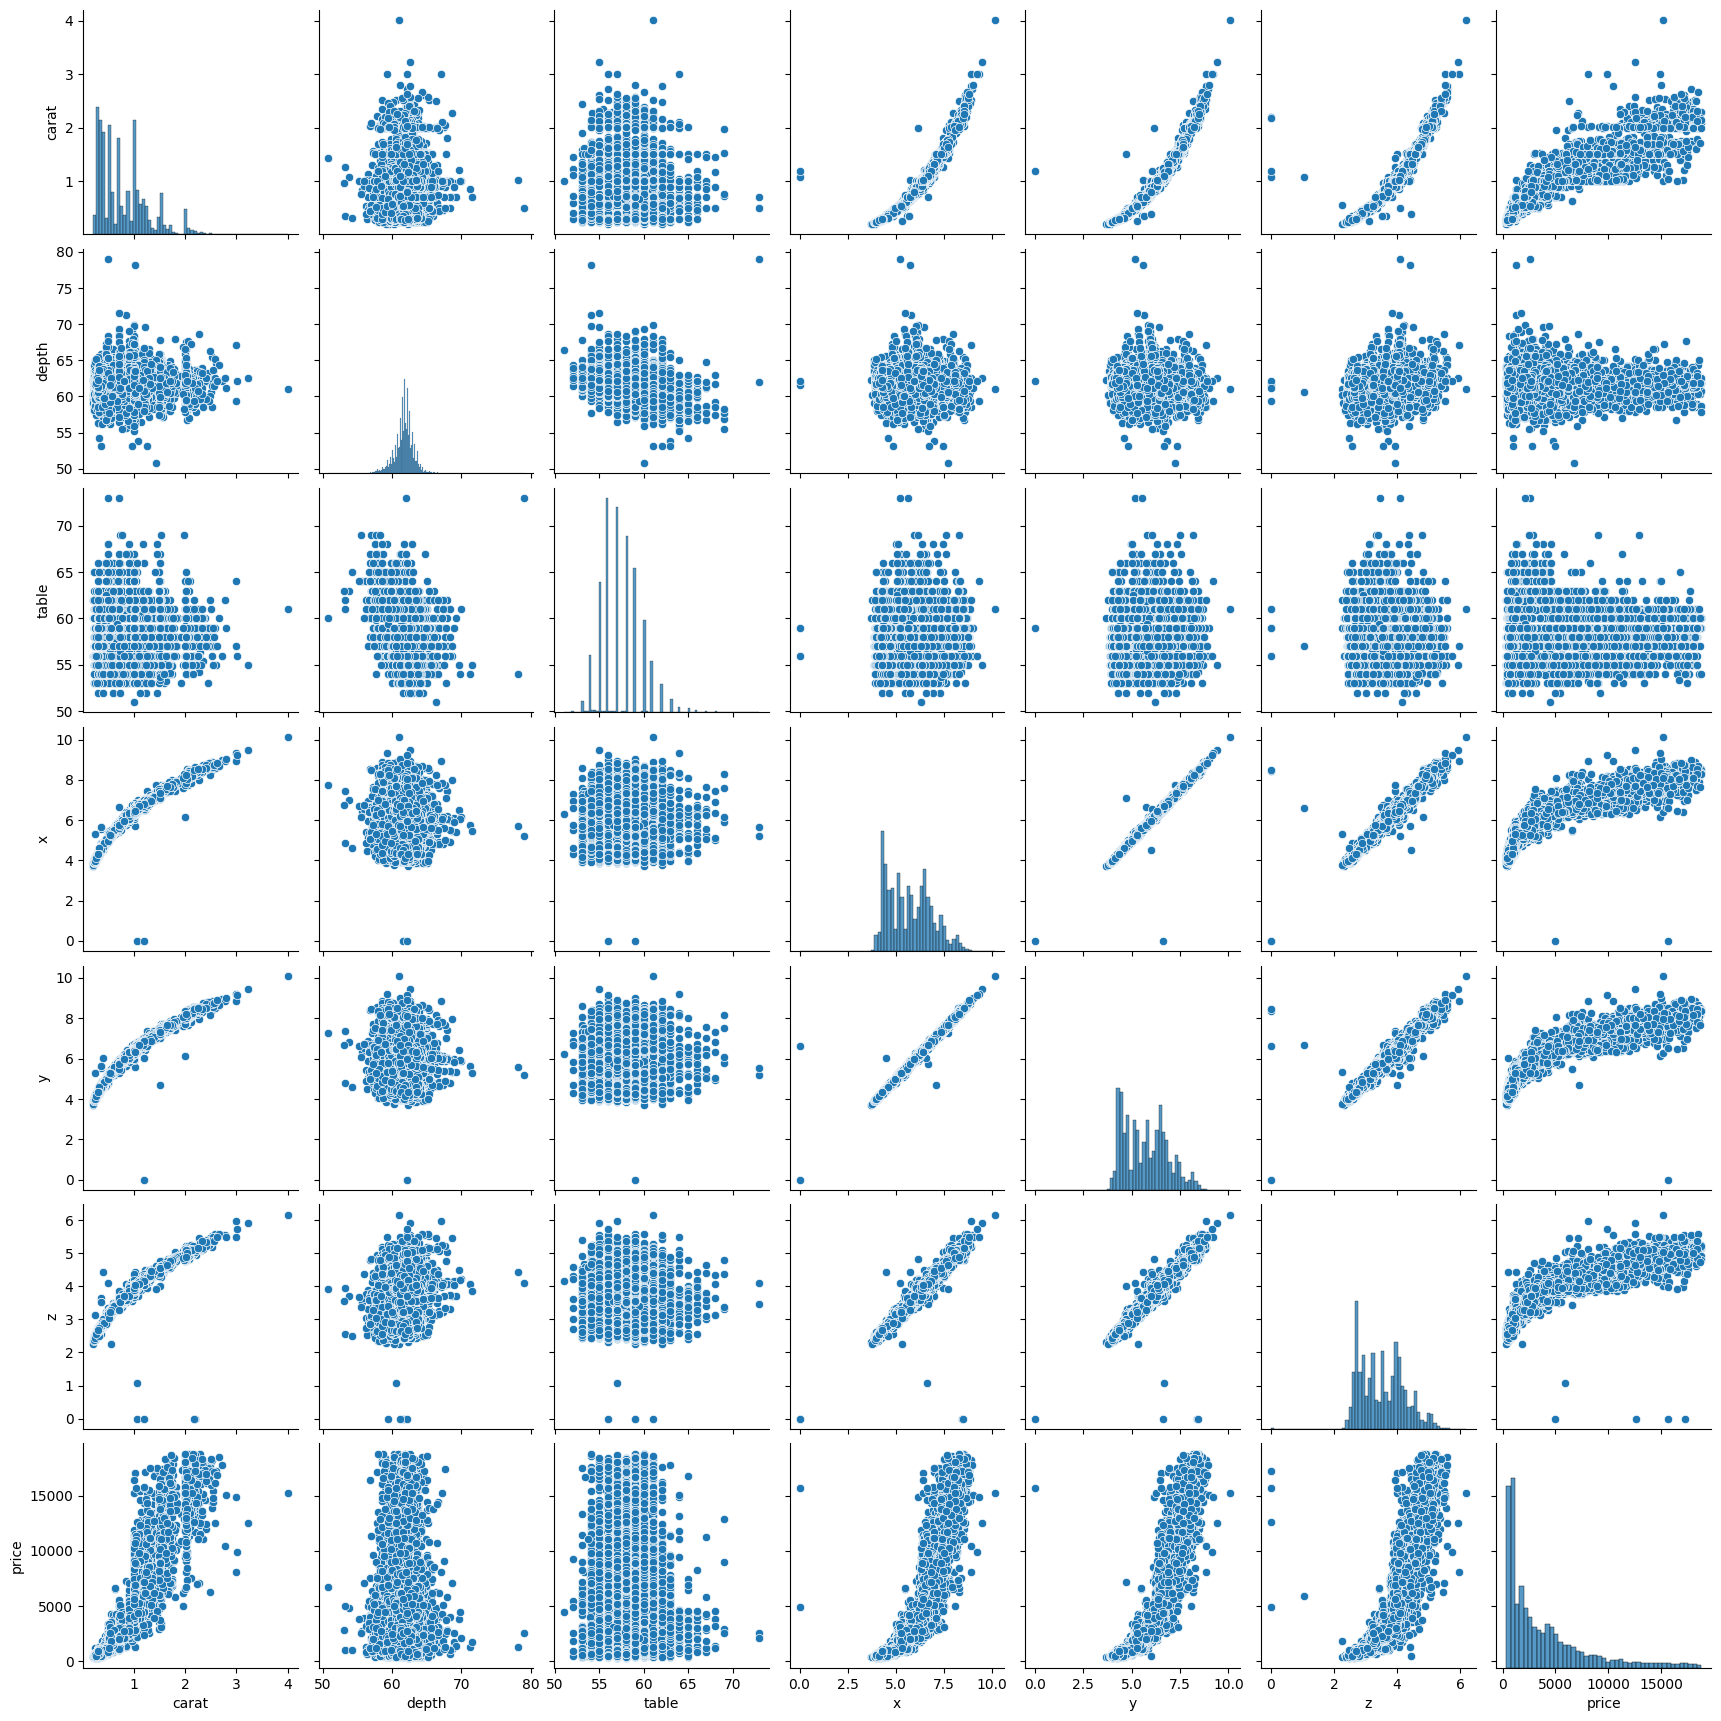

In [ ]:
df_test_original[['cut','color','clarity']] = df_test_original[['cut','color','clarity']].astype('category')
sns.pairplot(df_test_original)

In [ ]:
# We create a new data frame different from the original so that we can standarize test data
df_test = df_test_original.copy()

# Categorical --> Numerical
df_test['cut'] = df_test['cut'].map(cut_catg)
df_test['color'] = df_test['color'].map(color_catg)
df_test['clarity'] = df_test['clarity'].map(clarity_catg)
df_test.head(5)

carat cut color clarity  depth  table     x     y     z  price
id                                                                   
44001   1.09   5     4       6   62.5   56.0  6.54  6.58  4.10   8282
44002   0.70   3     5       3   59.8   60.0  5.75  5.83  3.46   2196
44003   2.01   2     2       3   58.8   60.0  8.27  8.19  4.84  16731
44004   0.27   5     5       8   61.8   55.0  4.14  4.21  2.57    760
44005   0.54   4     7       3   62.3   60.0  5.22  5.18  3.24   1715

We standarize the data, scale the x, y and z attributes to the range of values (-1, 1) and scale the log-transfomed numbers using the “transform” method instead of “fit_transform” to apply the exact same transformation learned from the training data.

In [ ]:
# Replace table with the standarized data
df_test[atr_to_standarize] = scaler_std.transform(df_test[atr_to_standarize])
df_test.head(5)

carat       cut     color   clarity     depth     table     x     y  \
id                                                                              
44001  0.617589  0.979358 -0.240334  1.178729  0.527195 -0.653054  6.54  6.58   
44002 -0.206163 -0.810247  0.347336 -0.639886 -1.375242  1.150741  5.75  5.83   
44003  2.560797 -1.705050 -1.415673 -0.639886 -2.079849  1.150741  8.27  8.19   
44004 -1.114402  0.979358  0.347336  2.391139  0.033971 -1.104003  4.14  4.21   
44005 -0.544112  0.084556  1.522675 -0.639886  0.386274  1.150741  5.22  5.18   

          z  price  
id                  
44001  4.10   8282  
44002  3.46   2196  
44003  4.84  16731  
44004  2.57    760  
44005  3.24   1715

In [ ]:
# Scale test data [x, y, z] attributes

# We manipulate their values as a single 1D vector
xyz_test = df_test[atr_to_scale].values.flatten()

# Scale values between -1 and 1
test_scaled_xyz = scale_minmax.transform(xyz_test.reshape(-1, 1)) # reshape(n_rows, n_columns) before transforming

# Reshape the scaled data to its original dimensions (n_rows, n_columns) and
# replace table with the scaled data
df_test[atr_to_scale] = test_scaled_xyz.reshape(-1, len(atr_to_scale))

df_test.head(5)

carat       cut     color   clarity     depth     table         x  \
id                                                                            
44001  0.617589  0.979358 -0.240334  1.178729  0.527195 -0.653054  0.032258   
44002 -0.206163 -0.810247  0.347336 -0.639886 -1.375242  1.150741 -0.149770   
44003  2.560797 -1.705050 -1.415673 -0.639886 -2.079849  1.150741  0.430876   
44004 -1.114402  0.979358  0.347336  2.391139  0.033971 -1.104003 -0.520737   
44005 -0.544112  0.084556  1.522675 -0.639886  0.386274  1.150741 -0.271889   

              y         z  price  
id                                
44001  0.041475 -0.529954   8282  
44002 -0.131336 -0.677419   2196  
44003  0.412442 -0.359447  16731  
44004 -0.504608 -0.882488    760  
44005 -0.281106 -0.728111   1715

In [ ]:
# Create log_price column to store log-transformed price
df_test['log_price'] = np.log(df_test['price'])

# Replace previous column with its scaled data between 0.1 and 0.9
df_test['log_price'] = scale_log_minmax.transform(df_test[['log_price']])

df_test.head(5)

carat       cut     color   clarity     depth     table         x  \
id                                                                            
44001  0.617589  0.979358 -0.240334  1.178729  0.527195 -0.653054  0.032258   
44002 -0.206163 -0.810247  0.347336 -0.639886 -1.375242  1.150741 -0.149770   
44003  2.560797 -1.705050 -1.415673 -0.639886 -2.079849  1.150741  0.430876   
44004 -1.114402  0.979358  0.347336  2.391139  0.033971 -1.104003 -0.520737   
44005 -0.544112  0.084556  1.522675 -0.639886  0.386274  1.150741 -0.271889   

              y         z  price  log_price  
id                                           
44001  0.041475 -0.529954   8282   0.738107  
44002 -0.131336 -0.677419   2196   0.476262  
44003  0.412442 -0.359447  16731   0.876813  
44004 -0.504608 -0.882488    760   0.266960  
44005 -0.281106 -0.728111   1715   0.427496

In [ ]:
# Create new binary column named 'high_price' (used in section 4)
df_test['high_price'] = np.where(df_test['price'] >= 2500, 1, 0)

df_test.head(5)

carat       cut     color   clarity     depth     table         x  \
id                                                                            
44001  0.617589  0.979358 -0.240334  1.178729  0.527195 -0.653054  0.032258   
44002 -0.206163 -0.810247  0.347336 -0.639886 -1.375242  1.150741 -0.149770   
44003  2.560797 -1.705050 -1.415673 -0.639886 -2.079849  1.150741  0.430876   
44004 -1.114402  0.979358  0.347336  2.391139  0.033971 -1.104003 -0.520737   
44005 -0.544112  0.084556  1.522675 -0.639886  0.386274  1.150741 -0.271889   

              y         z  price  log_price  high_price  
id                                                       
44001  0.041475 -0.529954   8282   0.738107           1  
44002 -0.131336 -0.677419   2196   0.476262           0  
44003  0.412442 -0.359447  16731   0.876813           1  
44004 -0.504608 -0.882488    760   0.266960           0  
44005 -0.281106 -0.728111   1715   0.427496           0

### Prediction algorithms

In the following subsections, we use 5-fold cross-validation on scaled training data to estimate the prediction error of each model (and to get the best possible parameters in some cases). Then, we train the final model on the full training set and make predictions on the test data.



Once these values are computed, we compare the predicted error (from cross-validation) and the error from the predictions on the test set, both computed using MAPE (Mean Absolute Percentage Error) on the scaled log-transformed data. This process allows us to measure the model’s perfomance, as these two errors should be close to each other, indicating that the model does not overfit and provides reliable predictions.



Afterward, we evaluate the final prediction quality on real (unscaled) prices. To do this, we inverse-transform the predicted scaled log values from the test data, apply the exponential function to recover prices in USD, and compute MAPE again using these predicted prices compared to the actual ones. This final score represents the average percentage error for the real (unscaled) values of predicted data, giving us a clear measurement of how accurate our model actually is.

To choose the best hyperparameters for our models, we followed a different method according to the complexity of each algorithm (both in the prediction and classification models).

For simple models like k-NN, which only requires one parameter, we applied 5-fold cross-validation across a range of values and selected the one with the lowest average MAPE. However, for more complex models like Support Vector Machines (SVM) and Multilayer Neural Networks with Backpropagation (MLNN-BP), which involve multiple hyperparameters, we first performed a grid search to determine the best options for the model’s core structure. And once we identified the best configuration for the model’s foundation, we fixed those choices and carried out a finer grid search on the remaining numeric hyperparameters.


To initialize this section, we store the dependent and independent values of the train and test data:

In [ ]:
# Select independent values
X_train = df_clean.drop(columns=['price', 'log_price', 'high_price'])
X_test = df_test.drop(columns=['price', 'log_price', 'high_price'])

# Select dependent values
y_train = df_clean['log_price']
y_test = df_test['log_price']

# Store real price
test_real_price = df_test['price']
train_real_price = df_clean['price']

# Initialize the new dataframe where we will append the columns with our predictions
df_test_original_3 = df_test_original.copy()

# Seed for random inicializations
rand_seed = 5

#### Multilinear Regression (MLR)

In [ ]:
# 5‑fold cross‑validation to estimate training error (scaled_log_price)
mlr_model_cv = LinearRegression()
scores = cross_val_score(mlr_model_cv, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
mape_cv_mlr = -scores.mean() * 100
print(f"MAPE MLR on the train set (predicted error for the scaled_log_price): {mape_cv_mlr:.5f}%")

# Train on full training data
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Prediction on test set (scaled_log_price)
y_pred_scaled_mlr = mlr_model.predict(X_test)

# MAPE on test set (scaled_log_price)
mape_scaled_test_mlr = mean_absolute_percentage_error(y_test, y_pred_scaled_mlr) * 100
print(f"MAPE MLR on the test set (scaled_log_price): {mape_scaled_test_mlr:.5f}%")

# Descale predicted log_price on test set
y_pred_log_mlr = scale_log_minmax.inverse_transform(y_pred_scaled_mlr.reshape(-1, 1))

# Apply exponential to get the real predicted prices on test set
pred_price_mlr = np.exp(y_pred_log_mlr)

# Add column to the original dataframe
df_test_original_3["pred_price_mlr"] = pred_price_mlr

# MAPE on test set (real_prices)
mape_mlr = mean_absolute_percentage_error(test_real_price, pred_price_mlr) * 100
print(f"MAPE MLR on the test set (real_prices): {mape_mlr:.5f}%")

MAPE MLR on the train set (predicted error for the scaled_log_price): 5.52126%
MAPE MLR on the test set (scaled_log_price): 5.67383%
MAPE MLR on the test set (real_prices): 11.63345%


#### K-Nearest Neighbors (k-NN)

In [ ]:
# Range of values for k
k_values = range(1, 15)
cv_mape_scores = []

# Cross-validation with k‑NN for different values of k (scaled_log_price)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')  # negative MAPE scores
    mape = -scores.mean() * 100
    cv_mape_scores.append(mape)

# Find best value of k using cross-validation with MAPE
best_k = k_values[np.argmin(cv_mape_scores)]
best_mape_cv = min(cv_mape_scores)

print(f"Best value of k: {best_k}")
print(f"MAPE k-NN on the train set (predicted error for the scaled_log_price): {best_mape_cv:.5f}%")

# Train the model with the best value of k on the full training set
final_knn_model = KNeighborsRegressor(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)

# Prediction on test set (scaled_log_price)
y_pred_scaled_knn = final_knn_model.predict(X_test)

# MAPE on test set (scaled_log_price)
mape_scaled_test_knn = mean_absolute_percentage_error(y_test, y_pred_scaled_knn) * 100
print(f"MAPE k-NN on the test set (scaled_log_price): {mape_scaled_test_knn:.5f}%")

# Descale predicted log_price on test set
y_pred_log_knn = scale_log_minmax.inverse_transform(y_pred_scaled_knn.reshape(-1, 1))

# Apply exponential to get the real predicted prices on test set
pred_price_knn = np.exp(y_pred_log_knn)

# Add column to the original dataframe
df_test_original_3["pred_price_knn"] = pred_price_knn

# MAPE on test set (real_prices)
mape_knn = mean_absolute_percentage_error(test_real_price, pred_price_knn) * 100
print(f"MAPE k-NN on the test set (real_prices): {mape_knn:.5f}%")

Best value of k: 5
MAPE k-NN on the train set (predicted error for the scaled_log_price): 7.26209%
MAPE k-NN on the test set (scaled_log_price): 6.99827%
MAPE k-NN on the test set (real_prices): 13.14493%


#### Multilayer Neural Network with Back-Propagation (MLNN-BP)

General scouting of parameters:\
First of all, we do a general scouting of the parameters to have an idea of which might be the best ones.\
\
(We add this as a comment to avoid unnecessary execution time, but note that it can be executed if pasted in the section below)

In [ ]:
#param_grid_bp = {
#    'hidden_layer_sizes': [
#        (8,), (16,), (32,),                     # shallow (1 layer)
#        (16, 8), (32, 16), (32, 32),            # medium (2 layers)
#        (32, 16, 8), (16, 16, 16), (64, 32, 16) # deep (3 layers)
#    ],
#    'activation': ['relu', 'tanh', 'logistic']
#}

Now we have a general idea of the best parameters: {best hidden_layer_sizes: (64, 32, 16), best activation: relu}.\
So what we are going to do next is keep relu as our activation function and try several 3-hidden_layer descending architectures.

We also find out by plotting the Training Loss curve initially on a large amount of epochs that we only need around 200 epochs to train the model.

In [ ]:
# Epochs (max_iter) for BP model
epochs_bp_3 = 200

# Param grid for hidden_layer_sizes and activation functions
param_grid_bp = {
    'hidden_layer_sizes': [
        (64, 32, 16),
        (128, 64, 32),
        (100, 50, 25),
        (32, 16, 8),
        (256, 128, 64),
        (50, 30, 10)
    ],
    'activation': ['relu']
}

# GridSearchCV with MLNN‑BP (scaled_log_price)
bp_base = MLPRegressor(max_iter=epochs_bp_3, random_state=rand_seed, tol=0.0, early_stopping=False)
grid_search_bp = GridSearchCV(bp_base, param_grid_bp, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search_bp.fit(X_train, y_train)

best_hidden_layer_sizes = grid_search_bp.best_params_['hidden_layer_sizes']
best_activation = grid_search_bp.best_params_['activation']
best_mape_cv_bp = -grid_search_bp.best_score_ * 100
print(f"Best hidden_layer_sizes: {best_hidden_layer_sizes}, best activation: {best_activation}")
print(f"MAPE MLNN-BP on the train set (predicted error for the scaled_log_price): {best_mape_cv_bp:.5f}%")

# Train the model with the best parameters on the full training set
final_bp_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes, activation=best_activation, max_iter=epochs_bp_3, random_state=rand_seed, tol=0.0, early_stopping=False)
final_bp_model.fit(X_train, y_train)

# Prediction on test set (scaled_log_price)
y_pred_scaled_bp = final_bp_model.predict(X_test)

# MAPE on test set (scaled_log_price)
mape_scaled_test_bp = mean_absolute_percentage_error(y_test, y_pred_scaled_bp) * 100
print(f"MAPE MLNN-BP on the test set (scaled_log_price): {mape_scaled_test_bp:.5f}%")

# Descale predicted log_price on test set
y_pred_log_bp = scale_log_minmax.inverse_transform(y_pred_scaled_bp.reshape(-1, 1))

# Apply exponential to get the real predicted prices on test set
pred_price_bp = np.exp(y_pred_log_bp)

# Add column to the original dataframe
df_test_original_3["pred_price_bp"] = pred_price_bp

# MAPE on test set (real_prices)
mape_bp = mean_absolute_percentage_error(test_real_price, pred_price_bp) * 100
print(f"MAPE MLNN-BP on the test set (real_prices): {mape_bp:.5f}%")

Best hidden_layer_sizes: (128, 64, 32), best activation: relu
MAPE MLNN-BP on the train set (predicted error for the scaled_log_price): 3.29896%
MAPE MLNN-BP on the test set (scaled_log_price): 3.03291%
MAPE MLNN-BP on the test set (real_prices): 6.39961%


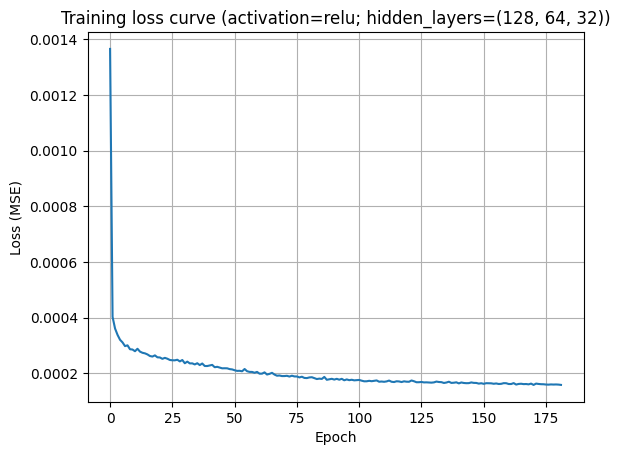

In [ ]:
# Plot the training loss curve stored during the training process
plt.plot(final_bp_model.loss_curve_)

plt.title(f"Training loss curve (activation={best_activation}; hidden_layers={best_hidden_layer_sizes})")
plt.xlabel("Epoch") # Epoch number in the x-axis
plt.ylabel("Loss (MSE)") # Loss value in the y-axis (MSE on log-price)
plt.grid(True)
plt.show()

### Scatterplots of predicted price vs actual price

In [ ]:
# We print the new dataframe which includes the predicted price columns
df_test_original_3.head(10)

carat        cut color clarity  depth  table     x     y     z  price  \
id                                                                             
44001   1.09      Ideal     G    VVS2   62.5   56.0  6.54  6.58  4.10   8282   
44002   0.70  Very Good     F     SI1   59.8   60.0  5.75  5.83  3.46   2196   
44003   2.01       Good     I     SI1   58.8   60.0  8.27  8.19  4.84  16731   
44004   0.27      Ideal     F      IF   61.8   55.0  4.14  4.21  2.57    760   
44005   0.54    Premium     D     SI1   62.3   60.0  5.22  5.18  3.24   1715   
44006   1.50    Premium     I     VS2   58.4   61.0  7.48  7.42  4.35   8820   
44007   1.52    Premium     G    VVS2   62.9   59.0  7.29  7.25  4.57  15404   
44008   1.00      Ideal     F     SI2   62.7   57.0  6.37  6.42  4.01   4721   
44009   0.32    Premium     G      IF   59.9   58.0  4.43  4.42  2.65   1020   
44010   0.35      Ideal     E     VS2   62.0   57.0  4.55  4.51  2.81    984   

       pred_price_mlr  pred_price_knn  pred_price_bp  
id                                                    
44001     7463.389039     8407.848181    8465.477828  
44002     2355.298965     2033.661168    2350.320554  
44003    12706.733432    14006.811974   14429.131414  
44004      773.974807      899.236595     730.987877  
44005     1717.723377     1305.575773    1611.511344  
44006     8685.787713     8971.710458    8099.667001  
44007    13374.242481    14944.405650   14214.905130  
44008     4439.696659     4268.789789    4410.861904  
44009      894.496353     1039.425740     981.448364  
44010      829.066242      836.313898     960.453272

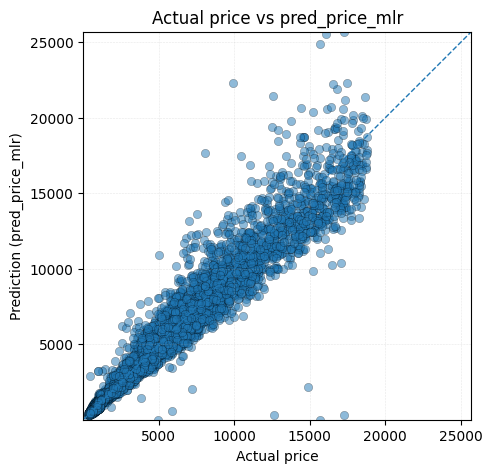

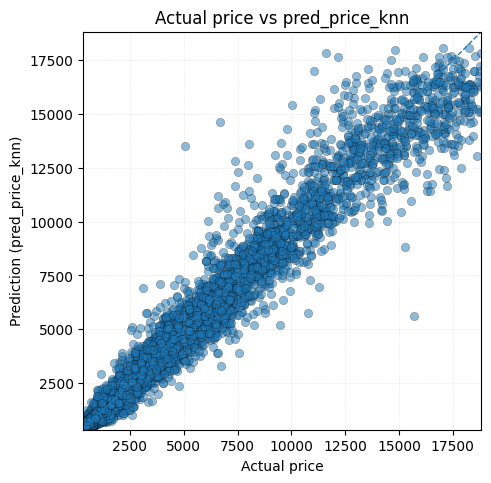

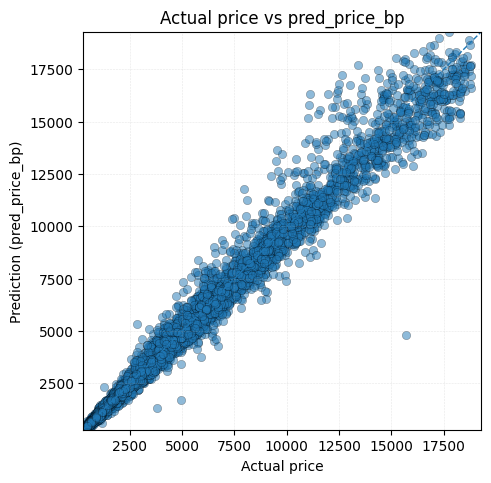

In [ ]:
# We collect every prediction column whose name starts with "pred_price"
pred_cols = [col for col in df_test_original_3.columns if col.startswith("pred_price")]

# For each of those columns, draw a separate scatter plot
for col in pred_cols:
    # Actual price
    x = df_test_original_3["price"]
    # Model prediction
    y = df_test_original_3[col]

    # Determine common limits so that both axes span exactly the same range
    axis_min = min(x.min(), y.min())
    axis_max = max(x.max(),  y.max())

    # Square figure
    plt.figure(figsize=(5, 5))
    plt.scatter(
        x, y,
        alpha=0.5,
        marker="o",
        edgecolor="k",
        linewidth=0.3,
    )

    # Draw the reference line with slope 1 (if the prediction is good it should cooincide with the scatterplot)
    plt.plot([axis_min, axis_max], [axis_min, axis_max], linestyle="--", linewidth=1)

    # Set identical limits and equal aspect ratio
    plt.xlim(axis_min, axis_max)
    plt.ylim(axis_min, axis_max)
    plt.gca().set_aspect("equal", adjustable="box")

    # Labels, title and grid
    plt.xlabel("Actual price")
    plt.ylabel(f"Prediction ({col})")
    plt.title(f"Actual price vs {col}")
    plt.grid(True, linestyle="--", linewidth=0.4, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Conclusions

Having predicted diamond prices on the test set based on their attributes using three different approaches, we compare the outcomes with the predicted-vs-actual price data plots and MAPE scores:


**Multilinear Regression (MLR)**


With MLR, we obtained a solid baseline model, with similar train and test MAPE scores on the scaled log-price (5.52% vs. 5.67%), indicating no overfitting. This translated into an 11.63% error after converting predictions back to real (unscaled) dollar values. While this is a reasonably accurate result, the linear nature of the model limits its ability to capture more complex or non-linear interactions between attributes. This limitation is also reflected in the predicted-vs-actual price scatter plot, where we can also see how the prediction error tends to increase with higher price values due to the model being trained on scaled data.

**k-Nearest Neighbors (k-NN)**


Using a simple cross-validation procedure, we found that the best predictions from k-NN were obtained by averaging the prices of the five most similar diamonds. The small difference between train and test MAPE on the scaled data (7.26% vs. 6.99%) suggests a good generalization performance. When evaluated on the actual dollar values, the model showed a higher MAPE (13.14%). Even whith this model having a more flexible approach (non-linear) compared to MLR, its performance still degrades for extreme price values due to the sparsity of similar high-end instances in the attribute space. This effect is also visible in the predicted-vs-actual price plot, where we observe increased dispersion at higher price levels, although predictions remain accurate within the denser mid-range.

**Multilayer Neural Network with Backpropagation (MLNN-BP)**

The MLNN-BP model clearly outperformed the other approaches when properly tuned. As previously explained, this model required a more detailed cross-validation process to optimize hyperparameters. Using grid search and analyzing the training loss curve, we selected a configuration with 200 epochs, ReLU activation, and three hidden layers with 128, 64, and 32 neuros, balancing prediction quality with execution time. This configuration resulted in minimal difference between train and test MAPE on the scaled data (3.29% vs. 3.03%) and achieved a MAPE of only 6.39% when converted to real dollar values. The model showed no signs of overfitting and produced the most accurate predictions overall, as clearly seen in the scatter plot, where the predicted values closely follow the diagonal line with significantly lower spread compared to the other models.


## 4. Price Classification

In this final section, we address the classification task of predicting whether a diamond's price is considered "high" ($\geq \$2500$) or "low" ($< \$2500$), using the binary "high_price" variable.

As in the regression section, we apply 5-fold cross-validation on the training set to estimate the prediction error and, in more complet models, to select the hyperparameters through grid search.


Then, we train the model on the full training set and evaluate its performance on the test data.

To compare the model's consistency we compute the accuracy, sensitivity and specificity both on the training (from cross-validation) and test sets.


To begin with, we store the new dependent variables:

In [ ]:
# We don't need to select independent values (X_train & X_test) as they are already selected at section 3
# Test data is already processed as well in section 3

# Select dependent values
y_train_hp = df_clean['high_price']
y_test_hp = df_test['high_price']

# Initialize the new dataframe where we will append the columns with our predictions
df_test_original_4 = df_test_original.copy()

#### Logistic Regression (LR)

In [ ]:
# Epochs (max_iter) for Logistic Regression
max_epochs_lr = 1000

# Prediction estimate with 5‑fold cross‑validation
lr_cv_model = LogisticRegression(random_state=rand_seed, max_iter=max_epochs_lr)
y_pred_cv_lr = cross_val_predict(lr_cv_model, X_train, y_train_hp, cv=5)

# Quality prediction
# Accuracy: total correct predictions / total samples | accuracy = (tp + tn) / (tp + tn + fp + fn)
lr_cv_accuracy = accuracy_score(y_train_hp, y_pred_cv_lr)
# Sensitivity (recall of the positive class = 1) | sensitivity = tp / (tp + fn)
lr_cv_sensitivity = recall_score(y_train_hp, y_pred_cv_lr, pos_label=1)
# Specificity (recall of the negative class = 0) | specificity = tn / (tn + fp)
lr_cv_specificity = recall_score(y_train_hp, y_pred_cv_lr, pos_label=0)

# Show results (CV)
print("Prediction (CV):")
print(f"  Accuracy:    {lr_cv_accuracy:.5f}")
print(f"  Sensitivity: {lr_cv_sensitivity:.5f}")
print(f"  Specificity: {lr_cv_specificity:.5f}")

# Train
lr_model = LogisticRegression(random_state=rand_seed, max_iter=max_epochs_lr)
lr_model.fit(X_train, y_train_hp)

# Prediction
y_pred_lr = lr_model.predict(X_test)

# Probabilities -> takes the probability of each diamond of being in class "high_price = 1" (2nd column)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Add columns to the original dataframe
df_test_original_4["class_high_price_lr"] = y_pred_lr
df_test_original_4["prob_high_price_lr"] = y_prob_lr

# Quality evaluation
lr_accuracy = accuracy_score(y_test_hp, y_pred_lr)
lr_sensitivity = recall_score(y_test_hp, y_pred_lr, pos_label=1)
lr_specificity = recall_score(y_test_hp, y_pred_lr, pos_label=0)

# Show results
print("Test:")
print(f"  Accuracy:    {lr_accuracy:.5f}")
print(f"  Sensitivity: {lr_sensitivity:.5f}")
print(f"  Specificity: {lr_specificity:.5f}")

Prediction (CV):
  Accuracy:    0.97585
  Sensitivity: 0.97336
  Specificity: 0.97824
Test:
  Accuracy:    0.97264
  Sensitivity: 0.97021
  Specificity: 0.97493


In [ ]:
print("Confusion matrix (Logistic Regression):")
print(confusion_matrix(y_test_hp, y_pred_lr))

Confusion matrix (Logistic Regression):
[[4978  128]
 [ 144 4690]]


#### Support Vector Machines (SVM)

General scouting of parameters:\
First of all, we do a general scouting of the parameters to have an idea of which might be the best ones.\
\
(We add this as a comment to avoid unnecessary execution time, but note that it can be executed if pasted in the section below)

In [ ]:
#param_grid_svm = [
#    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
#    {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10, 100]},
#    {'kernel': ['poly'], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10]}
#]

Now we have a general idea of the best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}.\
So what we are going to do next is keep everything constant and iterate over C values.

In [ ]:
# Hyperparameter search with 5‑fold cross‑validation
param_grid_svm = [
    {'kernel': ['rbf'], 'gamma': ['auto'], 'C': [5, 10, 15, 20, 25]}
]
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train_hp)

best_params_svm = grid_search_svm.best_params_

# Prediction estimate with 5‑fold cross‑validation (best parameters)
svm_cv_model = SVC(**best_params_svm)
y_pred_cv_svm = cross_val_predict(svm_cv_model, X_train, y_train_hp, cv=5)

# Quality prediction
# Accuracy: total correct predictions / total samples | accuracy = (tp + tn) / (tp + tn + fp + fn)
svm_cv_accuracy = accuracy_score(y_train_hp, y_pred_cv_svm)
# Sensitivity (recall of the positive class = 1) | sensitivity = tp / (tp + fn)
svm_cv_sensitivity = recall_score(y_train_hp, y_pred_cv_svm, pos_label=1)
# Specificity (recall of the negative class = 0) | specificity = tn / (tn + fp)
svm_cv_specificity = recall_score(y_train_hp, y_pred_cv_svm, pos_label=0)

# Show results (CV)
print(f"Best parameters: {best_params_svm}")
print("Prediction (CV):")
print(f"  Accuracy:    {svm_cv_accuracy:.5f}")
print(f"  Sensitivity: {svm_cv_sensitivity:.5f}")
print(f"  Specificity: {svm_cv_specificity:.5f}")

# Train
svm_model = SVC(**best_params_svm)
svm_model.fit(X_train, y_train_hp)

# Prediction
y_pred_svm = svm_model.predict(X_test)

# Add columns to the original dataframe
df_test_original_4["class_high_price_svm"] = y_pred_svm

# Quality evaluation
svm_accuracy = accuracy_score(y_test_hp, y_pred_svm)
svm_sensitivity = recall_score(y_test_hp, y_pred_svm, pos_label=1)
svm_specificity = recall_score(y_test_hp, y_pred_svm, pos_label=0)

# Show results
print("Test:")
print(f"  Accuracy:    {svm_accuracy:.5f}")
print(f"  Sensitivity: {svm_sensitivity:.5f}")
print(f"  Specificity: {svm_specificity:.5f}")

Best parameters: {'C': 15, 'gamma': 'auto', 'kernel': 'rbf'}
Prediction (CV):
  Accuracy:    0.97996
  Sensitivity: 0.97972
  Specificity: 0.98020
Test:
  Accuracy:    0.97988
  Sensitivity: 0.98118
  Specificity: 0.97865


In [ ]:
print("Confusion matrix (Support Vector Machines):")
print(confusion_matrix(y_test_hp, y_pred_svm))

Confusion matrix (Support Vector Machines):
[[4997  109]
 [  91 4743]]


#### Multilayer Neural Network amb Back-Propagation (MLNN-BP)

General scouting of parameters:\
First of all, we do a general scouting of the parameters to have an idea of which might be the best ones.\
\
(We add this as a comment to avoid unnecessary execution time, but note that it can be executed if pasted in the section below)

In [ ]:
#param_grid_bp_4 = {
#    'hidden_layer_sizes': [
#        (8,), (16,), (32,),                     # shallow (1 layer)
#        (16, 8), (32, 16), (32, 32),            # medium (2 layers)
#        (32, 16, 8), (16, 16, 16), (64, 32, 16) # deep (3 layers)
#    ],
#    'activation': ['relu', 'tanh', 'logistic']
#}

Now we have a general idea of the best parameters: {best hidden_layer_sizes: (32, 32), best activation: relu}.\
So what we are going to do next is keep relu as our activation function and try several 2-hidden_layer architectures.

We also find out by plotting the Training Loss curve initially on a large amount of epochs that we only need around 150 epochs to train the model.

In [ ]:
# Epochs (max_iter) for BP model
epochs_bp_4 = 150

# Param grid for hidden_layer_sizes and activation functions
param_grid_bp_4 = {
    'hidden_layer_sizes': [
        (32, 32),
        (48, 48),
        (64, 64),
        (64, 48),
        (64, 32),
        (80, 40),
        (96, 48),
        (128, 64),
        (100, 50),
        (48, 32),
        (40, 32),
        (32, 24),
        (32, 16)
    ],
    'activation': ['relu']
}

# GridSearchCV with MLNN-BP (classification)
bp_base_4 = MLPClassifier(max_iter=epochs_bp_4, random_state=rand_seed, tol=0.0, early_stopping=False)
grid_search_bp_4 = GridSearchCV(bp_base_4, param_grid=param_grid_bp_4, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_bp_4.fit(X_train, y_train_hp)

best_hidden_layer_sizes_bp_4 = grid_search_bp_4.best_params_['hidden_layer_sizes']
best_activation_bp_4 = grid_search_bp_4.best_params_['activation']
print(f"Best hidden_layer_sizes: {best_hidden_layer_sizes_bp_4}, best activation: {best_activation_bp_4}")

# Prediction estimate with 5‑fold cross‑validation using best params
cv_model_bp_4 = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes_bp_4, activation=best_activation_bp_4, max_iter=epochs_bp_4, random_state=rand_seed, tol=0.0, early_stopping=False)
y_pred_cv_bp_4 = cross_val_predict(cv_model_bp_4, X_train, y_train_hp, cv=5)

# Quality prediction
bp_cv_accuracy_4 = accuracy_score(y_train_hp, y_pred_cv_bp_4)
bp_cv_sensitivity_4 = recall_score(y_train_hp, y_pred_cv_bp_4, pos_label=1)
bp_cv_specificity_4 = recall_score(y_train_hp, y_pred_cv_bp_4, pos_label=0)

# Show results (CV)
print("Prediction (CV):")
print(f"  Accuracy:    {bp_cv_accuracy_4:.5f}")
print(f"  Sensitivity: {bp_cv_sensitivity_4:.5f}")
print(f"  Specificity: {bp_cv_specificity_4:.5f}")

# Train final model with best params on the full training set
final_bp_model_4 = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes_bp_4, activation=best_activation_bp_4, max_iter=epochs_bp_4, random_state=rand_seed, tol=0.0, early_stopping=False)
final_bp_model_4.fit(X_train, y_train_hp)

# Prediction
y_pred_bp_4 = final_bp_model_4.predict(X_test)

# Probabilities -> takes the probability of each diamond of being in class "high_price = 1" (2nd column)
y_prob_bp_4 = final_bp_model_4.predict_proba(X_test)[:, 1]

# Add columns to the original dataframe
df_test_original_4["class_high_price_bp"] = y_pred_bp_4
df_test_original_4["prob_high_price_bp"] = y_prob_bp_4

# Quality evaluation
bp_accuracy_4 = accuracy_score(y_test_hp, y_pred_bp_4)
bp_sensitivity_4 = recall_score(y_test_hp, y_pred_bp_4, pos_label=1)
bp_specificity_4 = recall_score(y_test_hp, y_pred_bp_4, pos_label=0)

# Show results
print("Test:")
print(f"  Accuracy:    {bp_accuracy_4:.5f}")
print(f"  Sensitivity: {bp_sensitivity_4:.5f}")
print(f"  Specificity: {bp_specificity_4:.5f}")

Best hidden_layer_sizes: (32, 32), best activation: relu
Prediction (CV):
  Accuracy:    0.98030
  Sensitivity: 0.98046
  Specificity: 0.98016
Test:
  Accuracy:    0.98078
  Sensitivity: 0.97890
  Specificity: 0.98257


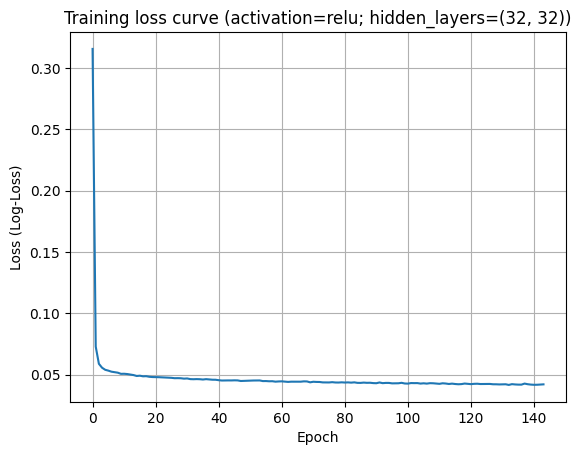

In [ ]:
# Retrieve the best model selected by GridSearchCV (already trained)
best_model = grid_search_bp_4.best_estimator_

# Plot the training loss curve
plt.plot(best_model.loss_curve_)
plt.title(f"Training loss curve (activation={best_activation_bp_4}; hidden_layers={best_hidden_layer_sizes_bp_4})")
plt.xlabel("Epoch") # Epoch number in the x-axis
plt.ylabel("Loss (Log-Loss)") # Loss value in the y-axis (log-loss or cross-entropy loss)
plt.grid(True)
plt.show()

In [ ]:
print("Confusion matrix (Multilayer Neural Network with Back-Propagation):")
print(confusion_matrix(y_test_hp, y_pred_bp_4))

Confusion matrix (Multilayer Neural Network with Back-Propagation):
[[5017   89]
 [ 102 4732]]


### ROC and AUC for LR and MLNN-BP

In [ ]:
# We print the new dataframe which includes the predicted class high price columns
df_test_original_4.head(10)

carat        cut color clarity  depth  table     x     y     z  price  \
id                                                                             
44001   1.09      Ideal     G    VVS2   62.5   56.0  6.54  6.58  4.10   8282   
44002   0.70  Very Good     F     SI1   59.8   60.0  5.75  5.83  3.46   2196   
44003   2.01       Good     I     SI1   58.8   60.0  8.27  8.19  4.84  16731   
44004   0.27      Ideal     F      IF   61.8   55.0  4.14  4.21  2.57    760   
44005   0.54    Premium     D     SI1   62.3   60.0  5.22  5.18  3.24   1715   
44006   1.50    Premium     I     VS2   58.4   61.0  7.48  7.42  4.35   8820   
44007   1.52    Premium     G    VVS2   62.9   59.0  7.29  7.25  4.57  15404   
44008   1.00      Ideal     F     SI2   62.7   57.0  6.37  6.42  4.01   4721   
44009   0.32    Premium     G      IF   59.9   58.0  4.43  4.42  2.65   1020   
44010   0.35      Ideal     E     VS2   62.0   57.0  4.55  4.51  2.81    984   

       class_high_price_lr  prob_high_price_lr  class_high_price_svm  \
id                                                                     
44001                    1            1.000000                     1   
44002                    0            0.194275                     0   
44003                    1            1.000000                     1   
44004                    0            0.000062                     0   
44005                    0            0.007062                     0   
44006                    1            1.000000                     1   
44007                    1            1.000000                     1   
44008                    1            0.999867                     1   
44009                    0            0.000086                     0   
44010                    0            0.000012                     0   

       class_high_price_bp  prob_high_price_bp  
id                                              
44001                    1        1.000000e+00  
44002                    0        2.464847e-01  
44003                    1        1.000000e+00  
44004                    0        1.895823e-06  
44005                    0        4.755208e-04  
44006                    1        1.000000e+00  
44007                    1        1.000000e+00  
44008                    1        9.999029e-01  
44009                    0        3.717400e-07  
44010                    0        1.203515e-07

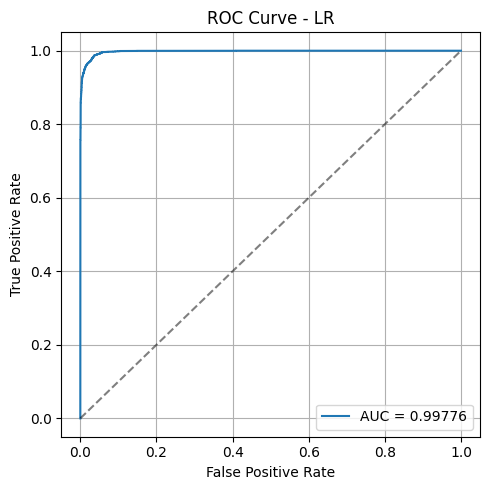

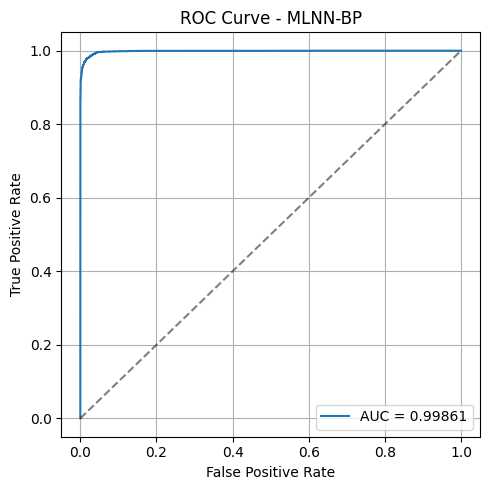

In [ ]:
# Dictionary with model names and their predicted probabilities
model_probs = {
    "LR": y_prob_lr,
    "MLNN-BP": y_prob_bp_4
}

# Loop through each model to compute and plot the ROC curve
for name, y_prob in model_probs.items():
    plt.figure(figsize=(5, 5))

    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y_test_hp, y_prob)
    # Compute Area Under the Curve
    auc_score = roc_auc_score(y_test_hp, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.5f}")

    # Plot the diagonal line (random chance)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

    # Labels and title
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")

    # Show legend and grid
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

### Conclusions

Having predicted whether each diamond’s price is considered "high" or "low" using three different classification models, we now compare their performance using the results obtained from cross-validation and test evaluation. In this section we used accuracy, sensitivity and specificity to avaluate the quality of the models. In the case of LR and MLNN-BP, we also looked at the ROC curves and AUC.

**Logistic Regression (LR)**


Logistic Regression gave very good and stable results, with almost identical values between the training and test sets. Accuracy, sensitivity, and specificity were all around 97%, which means the model works well and does not overfit. However, being a linear model, it might not be able to capture more complex patterns. The ROC curve also showed decent separation between the classes, although slightly below the neural network model, with an AUC equal to 0.99776.

**Support Vector Machines (SVM)**



After selecting its parameters with grid search, the SVM model performed even better. The accuracy, sensitivity, and specificity were close to 98% in both training and test sets, and the results were extremely consistent. The model generalizes very well and is capable of capturing non-linear decision boundaries, outperforming logistic regression across all metrics.

**Multilayer Neural Network with Backpropagation (MLNN-BP)**


MLNN-BP was the best performing model overall. After testing different configurations, we selected ReLU as the activation function and two hidden layers with 32 neurons each one. With this setup, the model reached over 98% accuracy in both training and test sets, with excellent sensitivity and specificity as well. Its predictions followed the actual data very closely, and the ROC curve showed an almost perfect separation. Even though this model could be further improved with a bit more time to tune and train, the results clearly show that it’s the most accurate and well-balanced option among the three.


As in the regression part, we also made sure that training times stayed short and reasonable, with grid searches and training steps completed in under 10 minutes each.

In a more professional scenario, we could use deeper architectures, which would improve even more the performance of the models. However, our main objective in this project was to apply the concepts learnt throughout the course, so the current was sufficient and effective.